In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [2]:
data = pd.read_csv('D:\data_fsds\Dataset\Algerian_forest_fires_dataset.csv',header = 1, skipinitialspace = True)
data.head(125)

day  month  year  Temperature   RH   Ws  Rain   \
0                               01     06  2012           29   57   18      0   
1                               02     06  2012           29   61   13    1.3   
2                               03     06  2012           26   82   22   13.1   
3                               04     06  2012           25   89   13    2.5   
4                               05     06  2012           27   77   16      0   
..                             ...    ...   ...          ...  ...  ...    ...   
120                             29     09  2012           26   80   16    1.8   
121                             30     09  2012           25   78   14    1.4   
122  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
123                            day  month  year  Temperature   RH   Ws  Rain    
124                             01     06  2012           32   71   12    0.7   

     FFMC  DMC    DC  ISI  BUI  FWI    Classes    
0    65.7  3.4   7.6  1.3  3.4  0.5  not fire     
1    64.4  4.1   7.6    1  3.9  0.4  not fire     
2    47.1  2.5   7.1  0.3  2.7  0.1  not fire     
3    28.6  1.3   6.9    0  1.7    0  not fire     
4    64.8    3  14.2  1.2  3.9  0.5  not fire     
..    ...  ...   ...  ...  ...  ...          ...  
120  47.4  2.9   7.7  0.3    3  0.1  not fire     
121    45  1.9   7.5  0.2  2.4  0.1  not fire     
122   NaN  NaN   NaN  NaN  NaN  NaN          NaN  
123  FFMC  DMC    DC  ISI  BUI  FWI    Classes    
124  57.1  2.5   8.2  0.6  2.8  0.2  not fire     

[125 rows x 14 columns]

In [3]:
data.shape

(246, 14)

In [4]:
data.describe()

day month  year Temperature   RH   Ws Rain   FFMC  DMC   DC  ISI  BUI  \
count   246   245   245         245  245  245   245   245  245  245  245  245   
unique   33     5     2          20   63   19    40   174  167  199  107  175   
top      01    07  2012          35   64   14     0  88.9  7.9    8  1.1    3   
freq      8    62   244          29   10   43   133     8    5    5    8    5   

        FWI Classes    
count   245       244  
unique  128         9  
top     0.4   fire     
freq     12       131

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
data.drop([122,123], axis = 0, inplace = True)
data.reset_index(drop= True,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


In [8]:
data.loc[:122,'Region'] = "Bejaia"
data.loc[122:,'Region'] = "Sidi-Bel Abbes"

In [9]:
data.head(125)

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...  ...  ...   
120  29    09  2012          26  80  16   1.8  47.4  2.9   7.7  0.3    3  0.1   
121  30    09  2012          25  78  14   1.4    45  1.9   7.5  0.2  2.4  0.1   
122  01    06  2012          32  71  12   0.7  57.1  2.5   8.2  0.6  2.8  0.2   
123  02    06  2012          30  73  13     4  55.7  2.7   7.8  0.6  2.9  0.2   
124  03    06  2012          29  80  14     2  48.7  2.2   7.6  0.3  2.6  0.1   

       Classes            Region  
0    not fire             Bejaia  
1    not fire             Bejaia  
2    not fire             Bejaia  
3    not fire             Bejaia  
4    not fire             Bejaia  
..           ...             ...  
120  not fire             Bejaia  
121  not fire             Bejaia  
122  not fire     Sidi-Bel Abbes  
123  not fire     Sidi-Bel Abbes  
124  not fire     Sidi-Bel Abbes  

[125 rows x 15 columns]

In [10]:
data.columns.str.strip()

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [11]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [12]:
data.columns = data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [13]:
data[data['Classes'].isnull()]

day month  year Temperature  RH  Ws Rain  FFMC   DMC      DC   ISI   BUI  \
165  14    07  2012          37  37  18  0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes          Region  
165  fire        NaN  Sidi-Bel Abbes

In [14]:
data.drop([165], axis = 0, inplace = True)
data.reset_index(drop= True,inplace=True)

In [15]:
data.head(175)

day month  year Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7   3.4   7.6   1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4   4.1   7.6     1   3.9   
2    03    06  2012          26  82  22  13.1  47.1   2.5   7.1   0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6   1.3   6.9     0   1.7   
4    05    06  2012          27  77  16     0  64.8     3  14.2   1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...   ...   ...   ...   ...   
170  20    07  2012          36  50  16     0  89.9  32.7    71   9.5  32.6   
171  21    07  2012          36  29  18     0  93.9  39.6  80.6  18.5  39.5   
172  22    07  2012          32  48  18     0  91.5  44.2  90.1  13.2    44   
173  23    07  2012          31  71  17     0  87.3  46.6    99   6.9  46.5   
174  24    07  2012          33  63  17   1.1  72.8  20.9  56.6   1.6  21.7   

      FWI      Classes          Region  
0     0.5  not fire             Bejaia  
1     0.4  not fire             Bejaia  
2     0.1  not fire             Bejaia  
3       0  not fire             Bejaia  
4     0.5  not fire             Bejaia  
..    ...          ...             ...  
170  17.3      fire     Sidi-Bel Abbes  
171    30      fire     Sidi-Bel Abbes  
172  25.4      fire     Sidi-Bel Abbes  
173  16.3      fire     Sidi-Bel Abbes  
174   2.5  not fire     Sidi-Bel Abbes  

[175 rows x 15 columns]

In [16]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    object
dtypes: object(15)
memory usage: 28.6+ KB


In [18]:
data.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            126
Classes          8
Region           2
dtype: int64

In [19]:
data['Classes'] = data['Classes'].str.strip()
data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

**Changing Data Type**

In [20]:
data['day'] = data['day'].astype(int)
data['month'] = data['month'].astype(int)
data['year'] = data['year'].astype(int)
data['Temperature'] = data['Temperature'].astype(float)
data['RH'] = data['RH'].astype(float)
data['Ws'] = data['Ws'].astype(float)
data['Rain'] = data['Rain'].astype(float)
data['FFMC'] = data['FFMC'].astype(float)
data['DMC'] = data['DMC'].astype(float)
data['DC'] = data['DC'].astype(float)
data['ISI'] = data['ISI'].astype(float)
data['BUI'] = data['BUI'].astype(float)
data['FWI'] = data['FWI'].astype(float)

In [21]:
data.dtypes

day              int32
month            int32
year             int32
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

In [22]:
categorical_features = [feature for feature in data.columns if data[feature].dtype== 'O']
numerical_features = [feature for feature in data.columns if data[feature].dtype!= 'O']

In [23]:
print('There are total {} categorical features and they are following : {}'.format(len(categorical_features),categorical_features))
print('\nThere are total {} Numerical features and they are following : {}'.format(len(numerical_features),numerical_features))

There are total 2 categorical features and they are following : ['Classes', 'Region']

There are total 13 Numerical features and they are following : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


D:\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


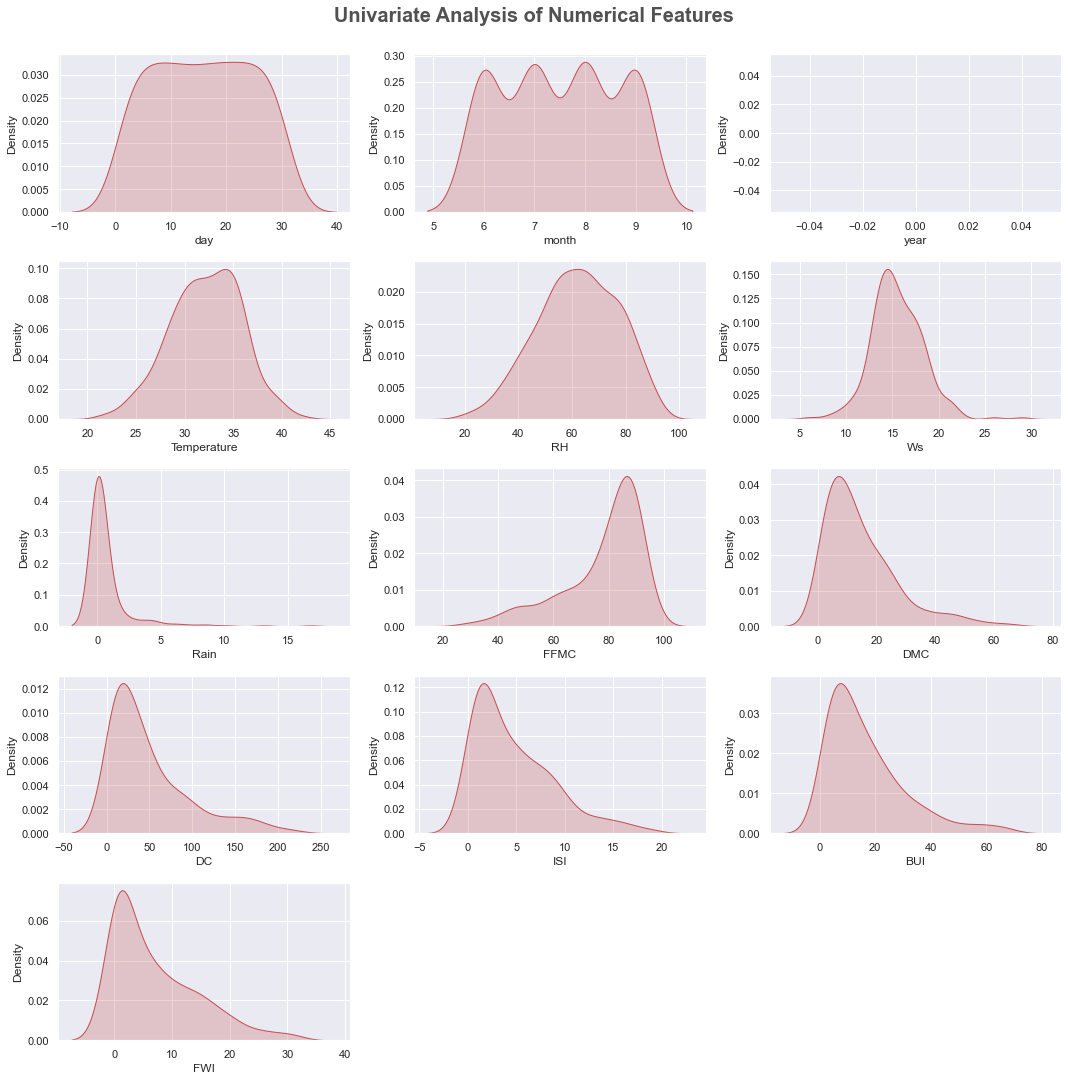

In [24]:
#check the ditribution for the numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

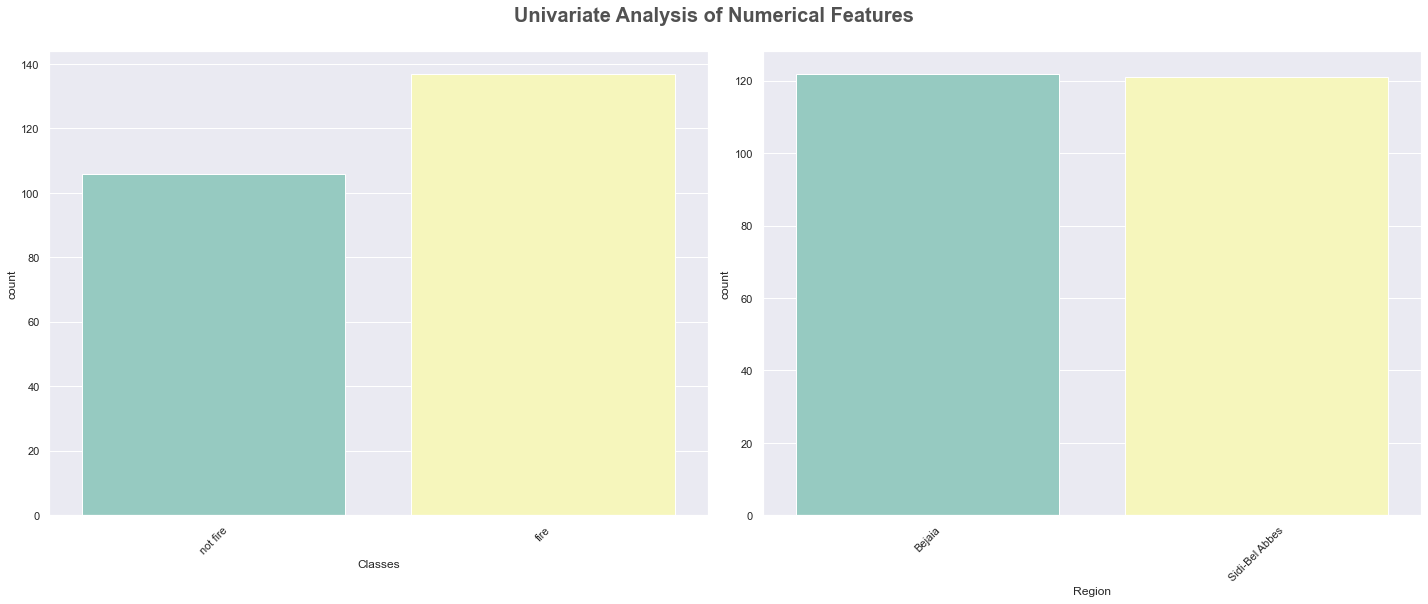

In [25]:
#check the ditribution for the categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=data[categorical_features[i]], palette="Set3")
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [26]:
data['Region'].value_counts()

Bejaia            122
Sidi-Bel Abbes    121
Name: Region, dtype: int64

In [27]:
data[data.duplicated()]

Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [28]:
### encoding classes feature
#data['Classes'] = data['Classes'].replace(('not fire','fire'),(0,1))

In [29]:
data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [30]:
data['Classes'].dtype

dtype('O')

In [31]:
df = data.copy()

In [32]:
df.head()

day  month  year  Temperature    RH    Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012         29.0  57.0  18.0   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012         29.0  61.0  13.0   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012         26.0  82.0  22.0  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012         25.0  89.0  13.0   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012         27.0  77.0  16.0   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI   Classes  Region  
0  0.5  not fire  Bejaia  
1  0.4  not fire  Bejaia  
2  0.1  not fire  Bejaia  
3  0.0  not fire  Bejaia  
4  0.5  not fire  Bejaia

In [33]:
### Dropping year feature as whole data is of year 2012.
df.drop('year', axis=1, inplace = True)

In [34]:
df.head()

day  month  Temperature    RH    Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6         29.0  57.0  18.0   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6         29.0  61.0  13.0   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6         26.0  82.0  22.0  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6         25.0  89.0  13.0   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6         27.0  77.0  16.0   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

    Classes  Region  
0  not fire  Bejaia  
1  not fire  Bejaia  
2  not fire  Bejaia  
3  not fire  Bejaia  
4  not fire  Bejaia

In [35]:
### encoding Classes feature with 0 for Not fire and 1 for fire
df['Classes'] = df['Classes'].replace(('not fire','fire'),(0,1))

In [36]:
df['Region'].unique()

array(['Bejaia', 'Sidi-Bel Abbes'], dtype=object)

In [37]:
### Encoding Region feature with 0 for Bejaia region and 1 for Sidi Bel-abbes region
df['Region'] = df['Region'].replace(('Bejaia','Sidi-Bel Abbes'),(0,1))

In [38]:
df['Region'].unique()

array([0, 1], dtype=int64)

In [39]:
df.head()

day  month  Temperature    RH    Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6         29.0  57.0  18.0   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6         29.0  61.0  13.0   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6         26.0  82.0  22.0  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6         25.0  89.0  13.0   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6         27.0  77.0  16.0   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

   Classes  Region  
0        0       0  
1        0       0  
2        0       0  
3        0       0  
4        0       0

In [40]:
df.dtypes

day              int32
month            int32
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object

In [41]:
df.cov()

day     month  Temperature          RH         Ws  \
day           78.190729 -0.003639     3.119138   -9.969476   1.188603   
month         -0.003639  1.242764    -0.229653   -0.681903  -0.124987   
Temperature    3.119138 -0.229653    13.162670  -35.043482  -2.901949   
RH            -9.969476 -0.681903   -35.043482  219.874333  10.173809   
Ws             1.188603 -0.124987    -2.901949   10.173809   7.903887   
Rain          -1.993174  0.077762    -2.372850    6.604836   0.965886   
FFMC          28.544043  0.272433    35.222858 -137.215388  -6.718952   
DMC           53.863133  0.938676    21.837668  -75.071928  -0.025120   
DC           222.524339  6.722457    65.071727 -160.400449  10.604530   
ISI            6.632060  0.303838     9.101371  -42.298446   0.099643   
BUI           65.061368  1.349400    23.734918  -74.653741   1.257586   
FWI           23.079143  0.685464    15.297068  -64.096917   0.677079   
Classes        0.891321  0.013298     0.930330   -3.184454  -0.097745   
Region         0.003639  0.001037     0.489984   -2.991651  -0.255178   

                  Rain        FFMC         DMC           DC         ISI  \
day          -1.993174   28.544043   53.863133   222.524339    6.632060   
month         0.077762    0.272433    0.938676     6.722457    0.303838   
Temperature  -2.372850   35.222858   21.837668    65.071727    9.101371   
RH            6.604836 -137.215388  -75.071928  -160.400449  -42.298446   
Ws            0.965886   -6.718952   -0.025120    10.604530    0.099643   
Rain          4.012837  -15.634746   -7.169025   -28.456455   -2.891688   
FFMC        -15.634746  205.912204  107.342972   347.051372   44.113113   
DMC          -7.169025  107.342972  153.587434   517.427748   35.032228   
DC          -28.456455  347.051372  517.427748  2272.009994  100.718521   
ISI          -2.891688   44.113113   35.032228   100.718521   17.257659   
BUI          -8.546509  120.872510  173.203205   638.862525   38.071147   
FWI          -4.835502   73.791799   80.764530   262.277746   28.526552   
Classes      -0.377380    5.487161    3.606817    12.106907    1.517740   
Region       -0.040159    1.597815    1.192729    -1.880308    0.547815   

                    BUI         FWI    Classes    Region  
day           65.061368   23.079143   0.891321  0.003639  
month          1.349400    0.685464   0.013298  0.001037  
Temperature   23.734918   15.297068   0.930330  0.489984  
RH           -74.653741  -64.096917  -3.184454 -2.991651  
Ws             1.257586    0.677079  -0.097745 -0.255178  
Rain          -8.546509   -4.835502  -0.377380 -0.040159  
FFMC         120.872510   73.791799   5.487161  1.597815  
DMC          173.203205   80.764530   3.606817  1.192729  
DC           638.862525  262.277746  12.106907 -1.880308  
ISI           38.071147   28.526552   1.517740  0.547815  
BUI          202.447968   90.831493   4.147920  0.637377  
FWI           90.831493   55.362048   2.659303  0.734784  
Classes        4.147920    2.659303   0.246948  0.040421  
Region         0.637377    0.734784   0.040421  0.251029

In [42]:
#Checking for distribution of numerical data
categorical_features = [feature for feature in df.columns if df[feature].dtype== 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtype!= 'O']
numerical_features

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

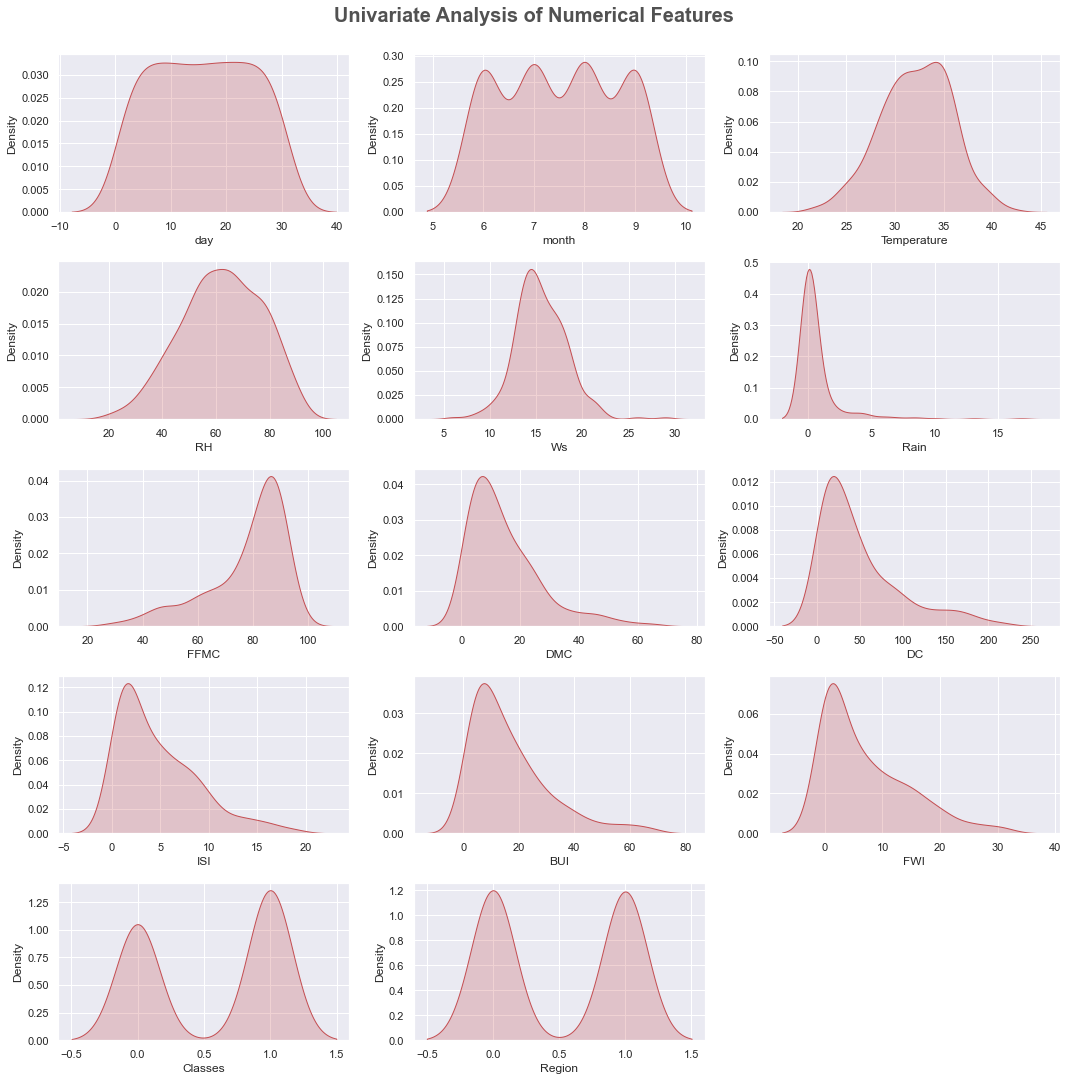

In [43]:
#check the ditribution for the numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

In [44]:
df.columns.value_counts().sum()

14

# Multivariate Analysis

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1080 with 0 Axes>

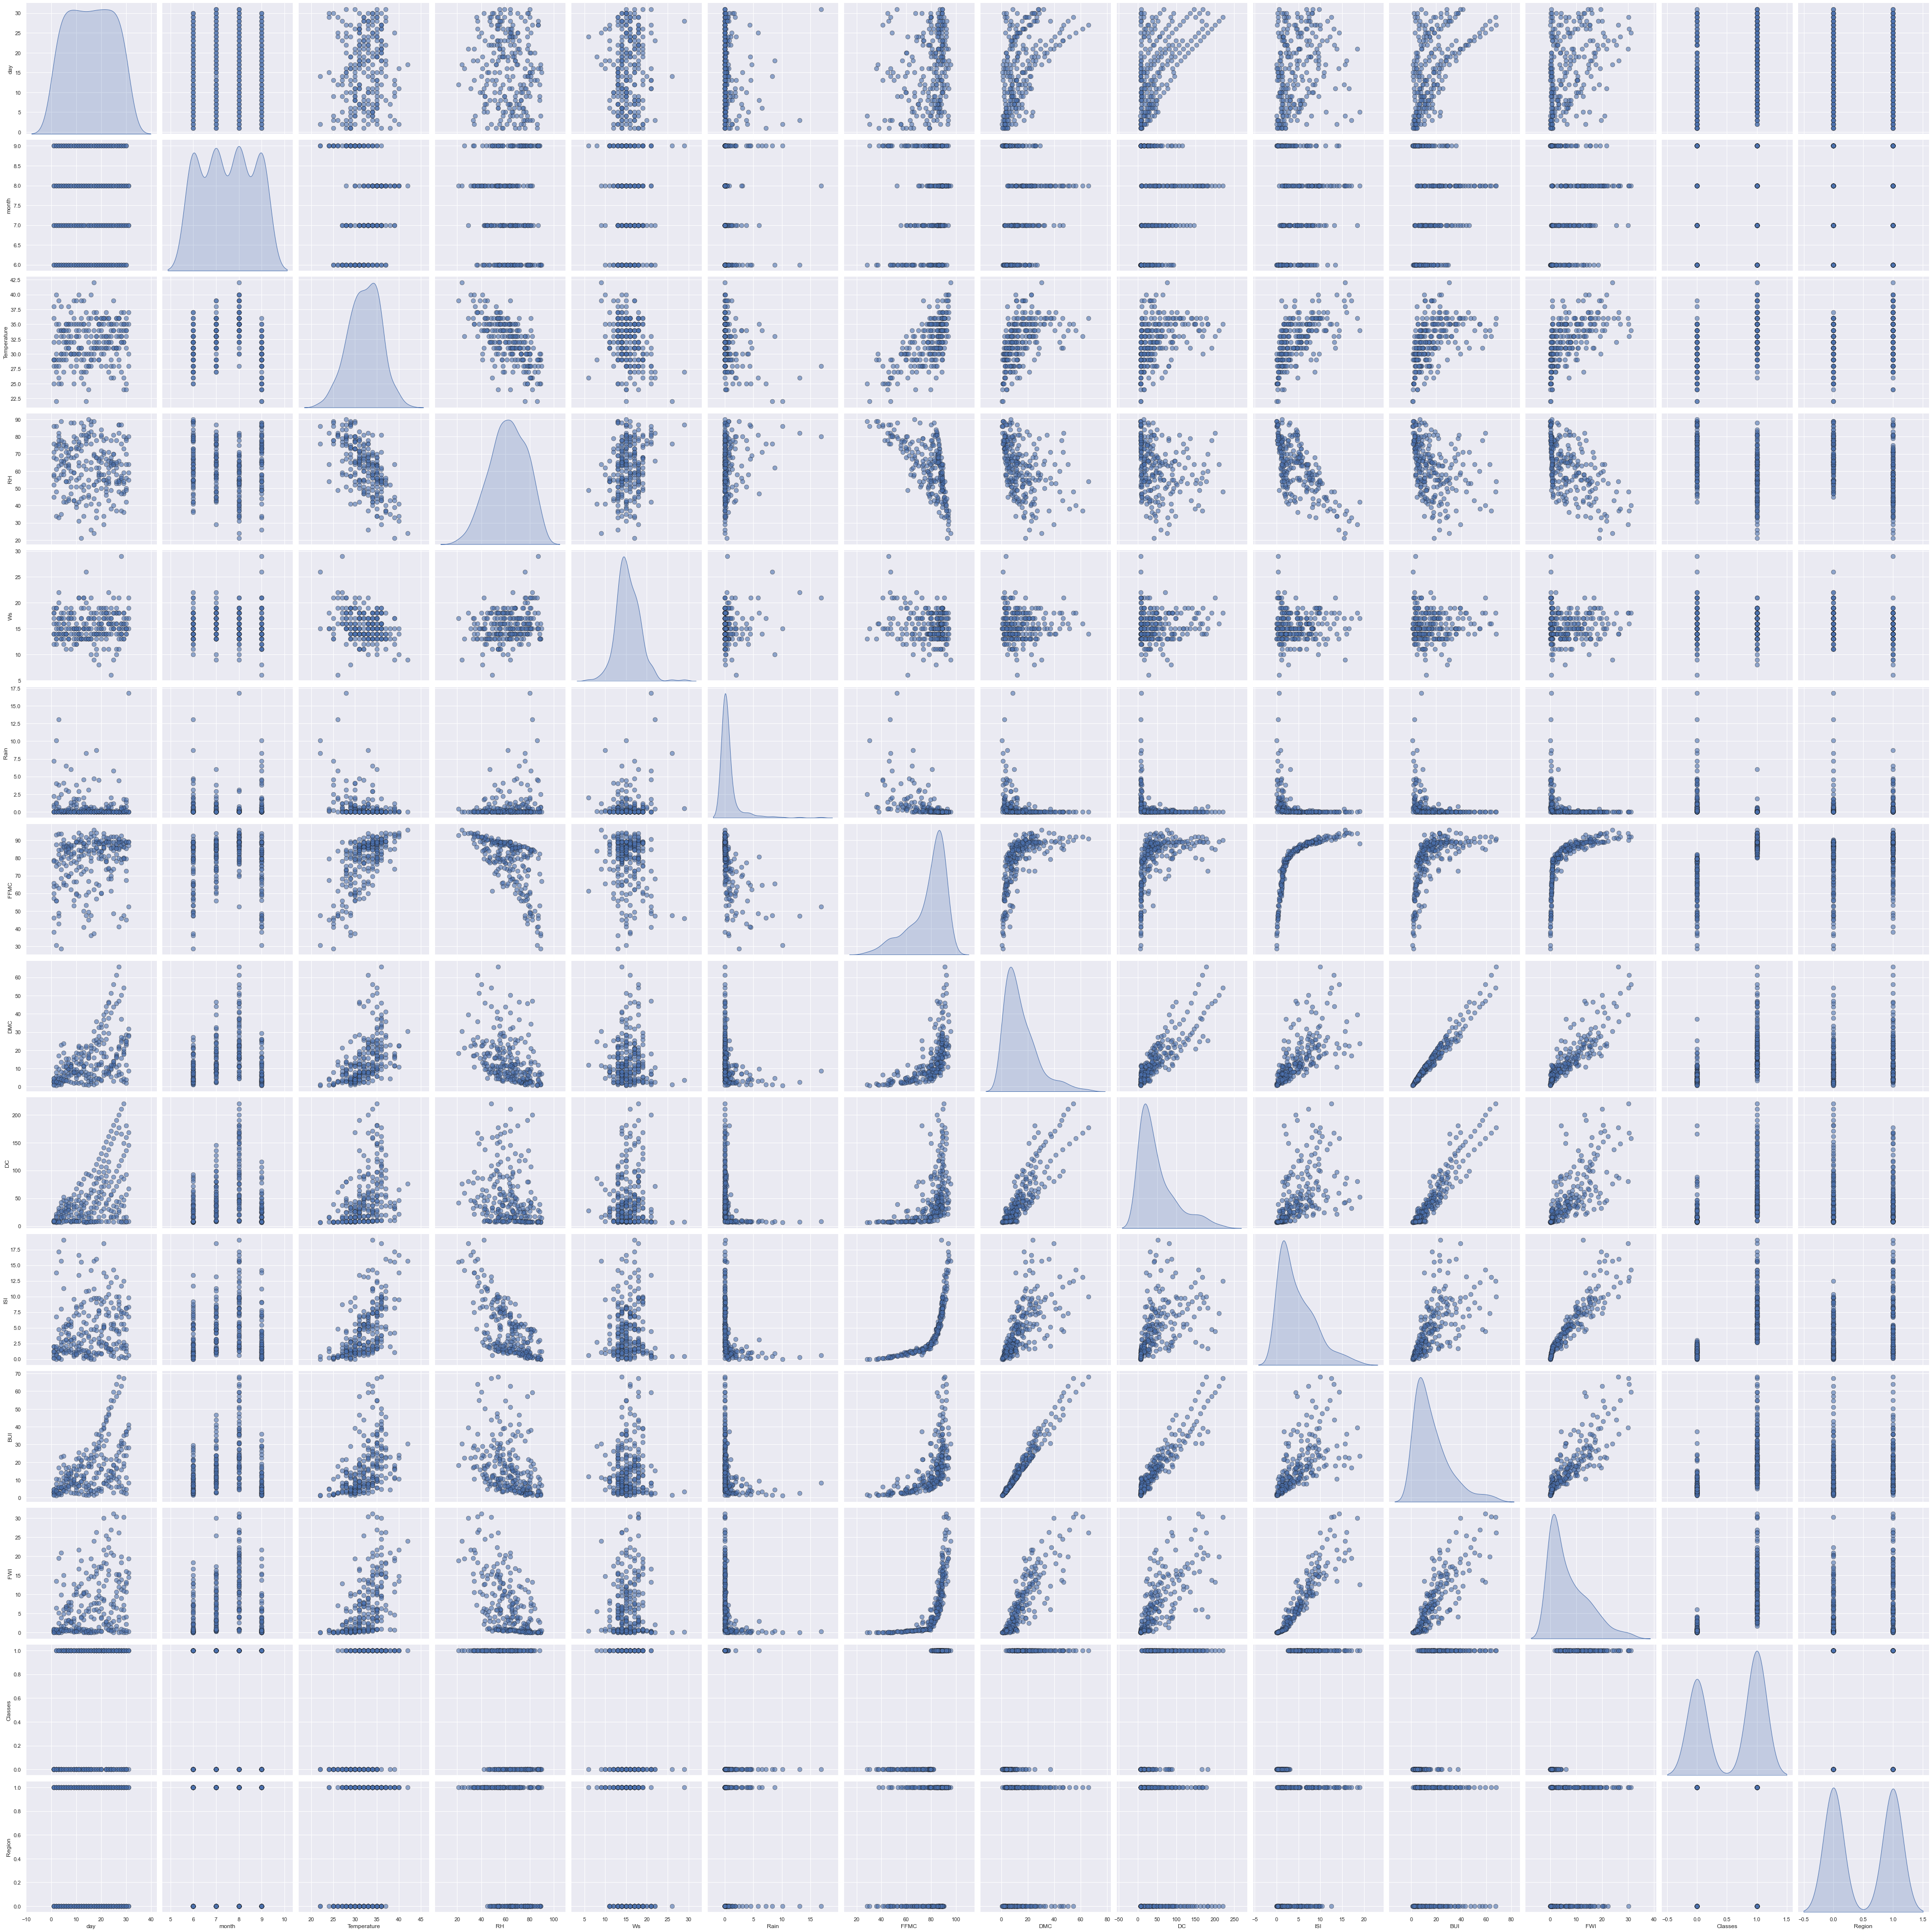

In [45]:
plt.figure(figsize=(15,15))
plt.suptitle('Multivariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(df,  diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)


<AxesSubplot:>

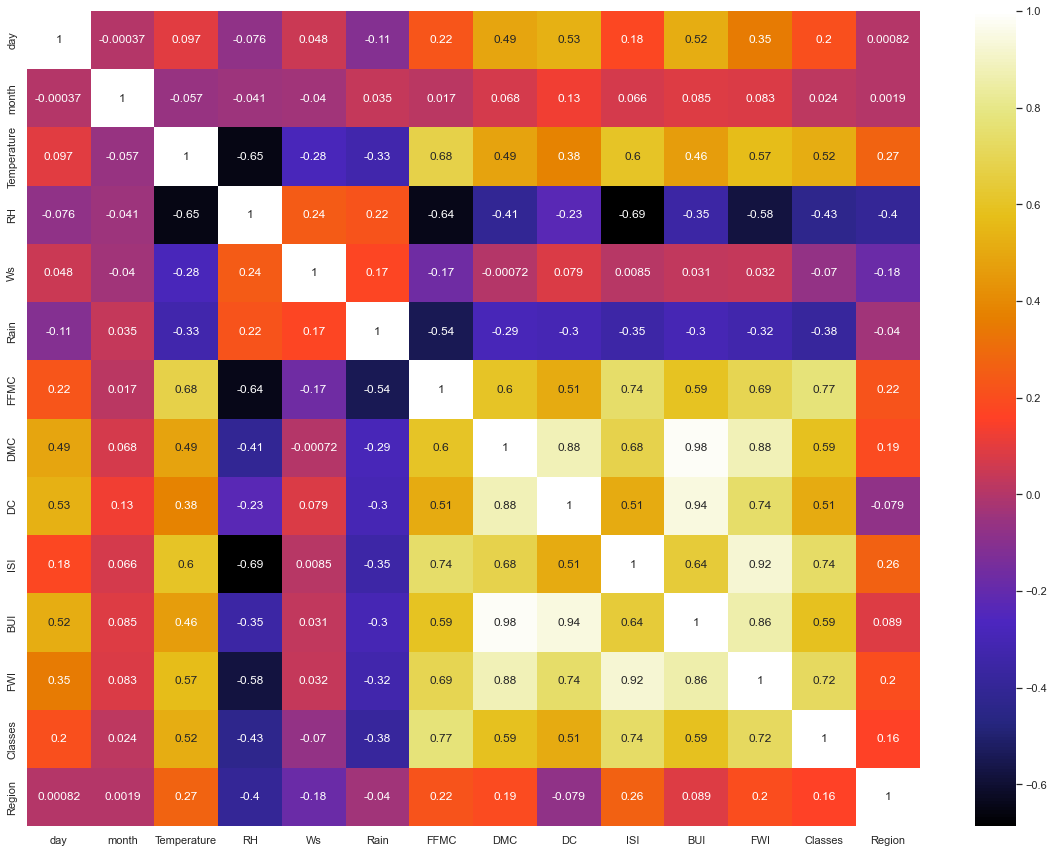

In [46]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),cmap="CMRmap", annot=True)

# Visualisation of Target Feature

In [47]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='Classes'>

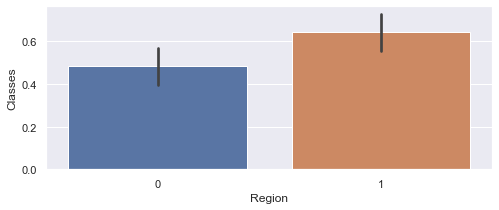

In [48]:
plt.rcParams['figure.figsize']=(8,3)
sns.barplot(x="Region",y="Classes",data=df)

#Observation: - Sidi-Bel Abbes region has most of the fire happen

<AxesSubplot:xlabel='Region', ylabel='Rain'>

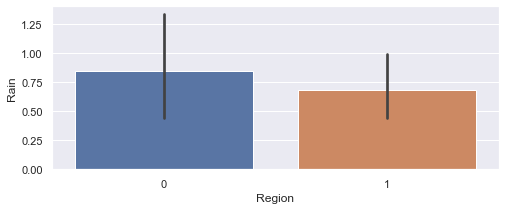

In [49]:
plt.rcParams['figure.figsize']=(8,3)
sns.barplot(x="Region",y="Rain",data=df)

#Observation: - Bejaia is the region where max rain happens

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

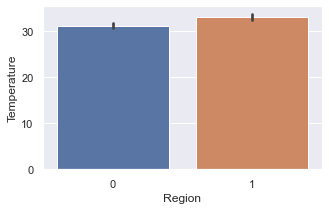

In [50]:
plt.rcParams['figure.figsize']=(5,3)
sns.barplot(x="Region",y="Temperature",data=df)

#Observation: - Sidi-Bel Abbes region has more temp as compared to Bejaia

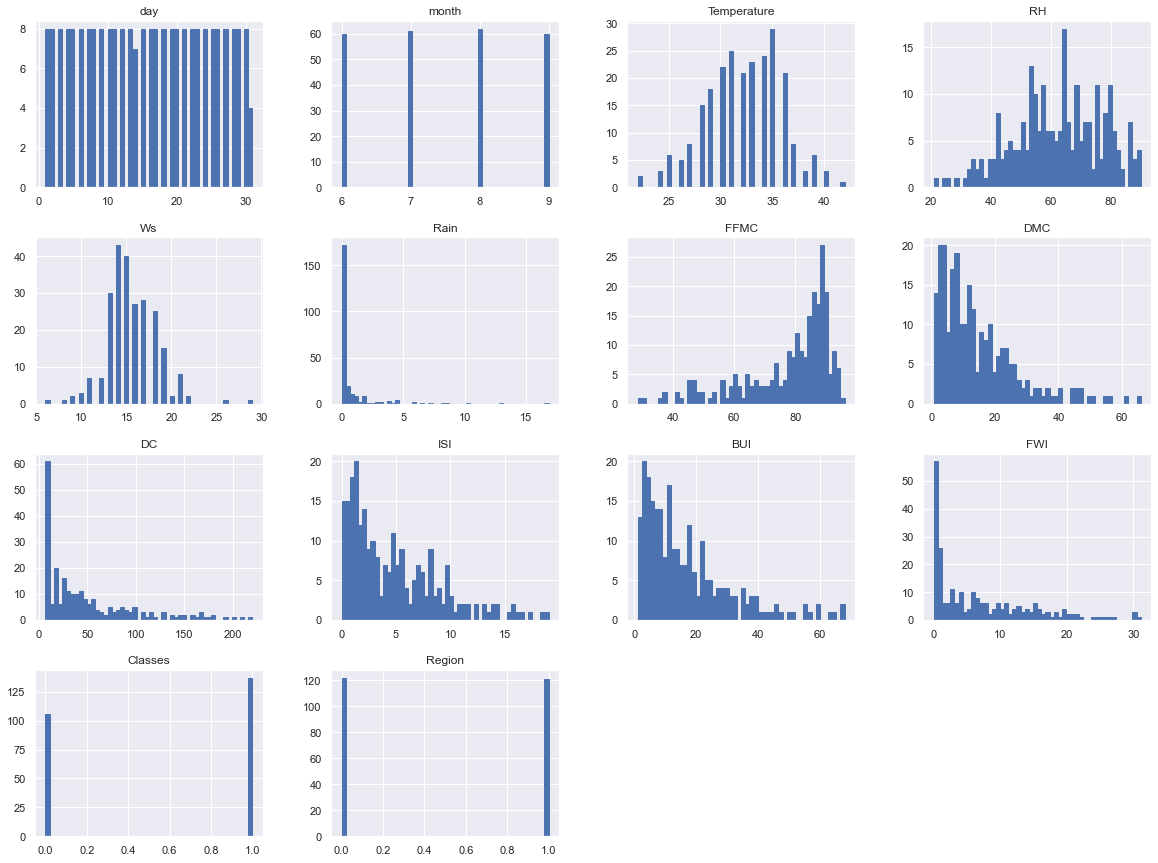

In [51]:
# Plotting density plot for all features
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

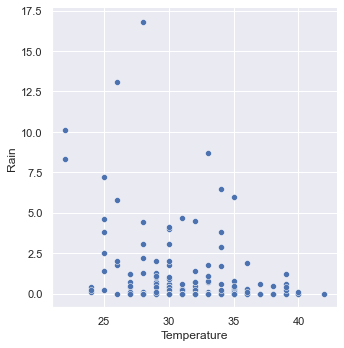

In [52]:
sns.relplot(x = 'Temperature', y = 'Rain', data = df)

#Observation - we can observe from the above graph that more the temperature less is the rain.maximum rain occured at 27.5 to 30.0 temperature

<AxesSubplot:ylabel='FFMC'>

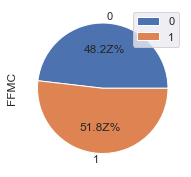

In [53]:
# Graph A
#1 - Sidi-Bel Abbes and 0 - Bejaia Region
df.groupby(['Region']).sum().plot(kind='pie', y='FFMC',autopct = '%1.1fZ%%')

#Observation - FFMC Percentage is more in Sidi-Bel Abbe Region

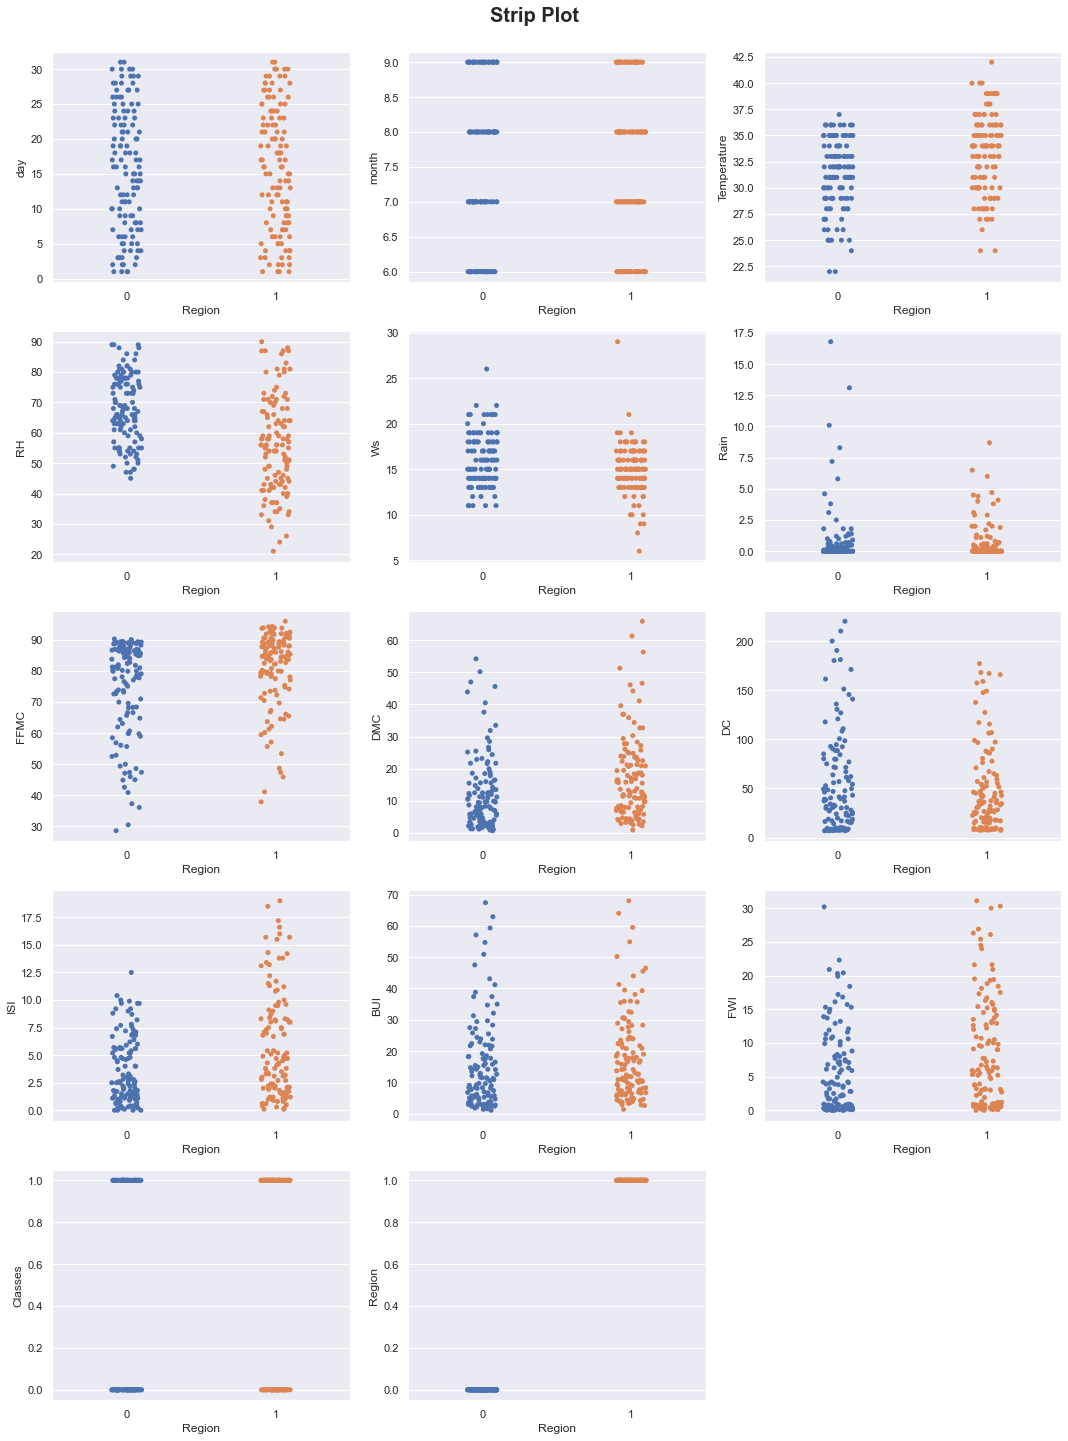

In [54]:
# strip plot to see the relationship between numerical features and Region

plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numerical_features[i], x='Region', data=df)
    plt.tight_layout()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

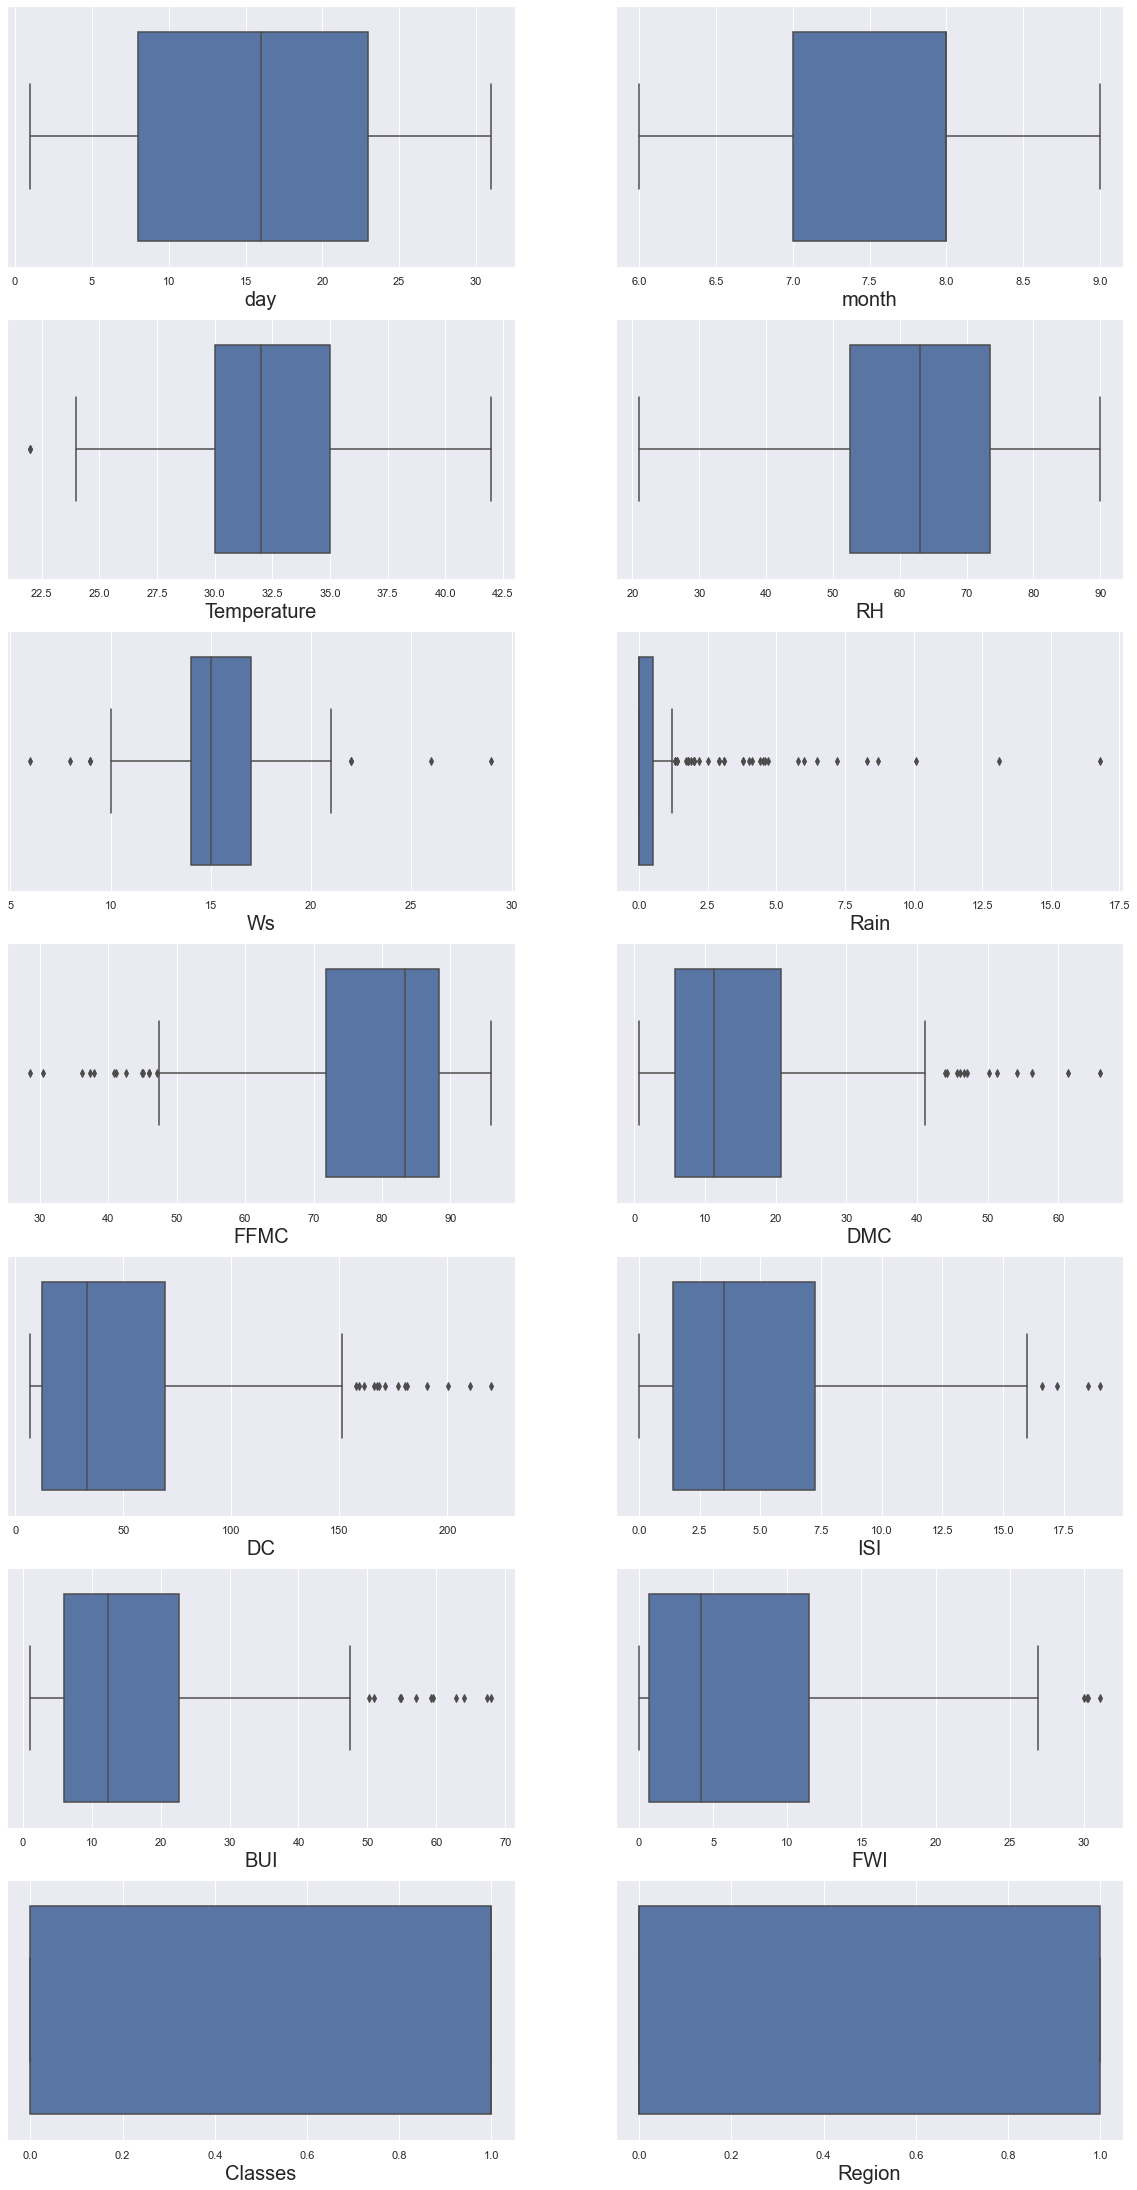

In [55]:
plt.figure(figsize=(20,45), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [56]:
# Ws, Rain, FFMC, DMC, DC BUI has many outliers

# Removing Outliers

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

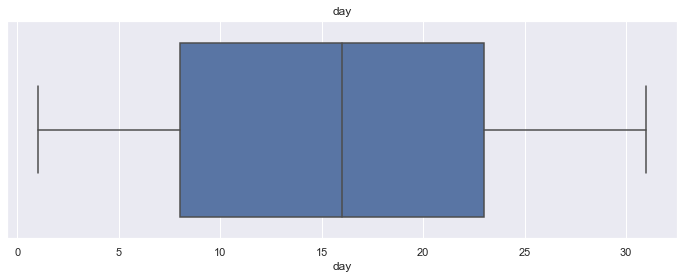

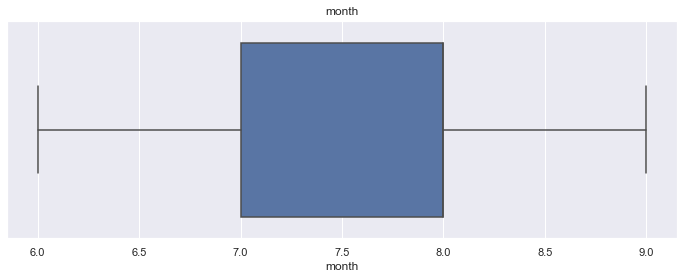

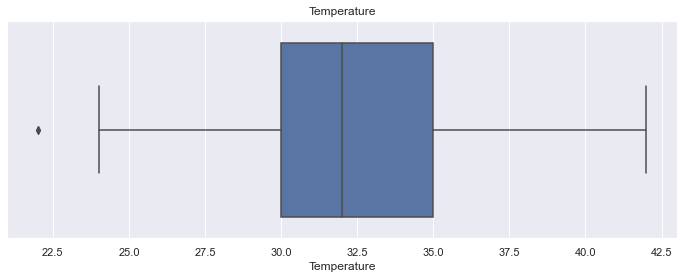

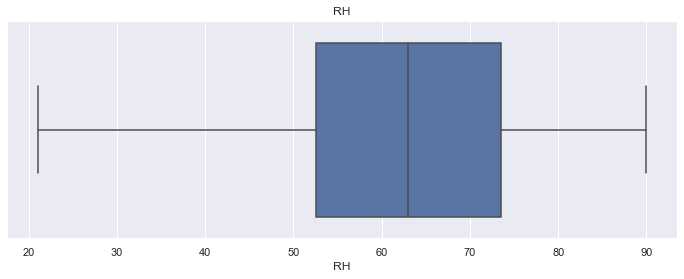

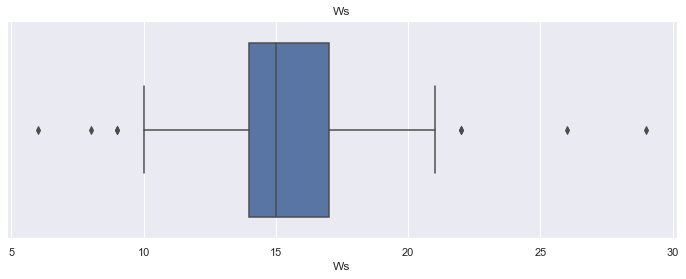

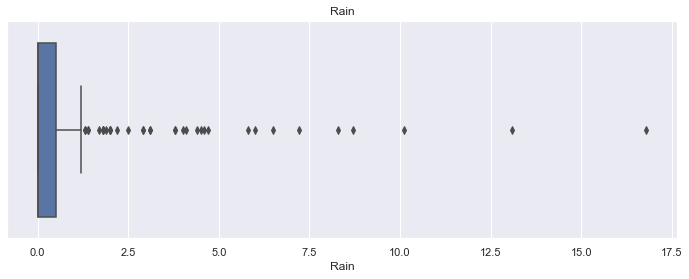

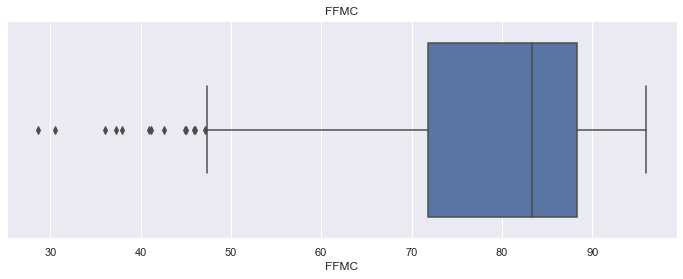

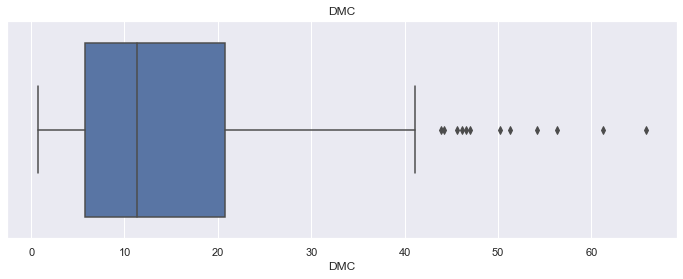

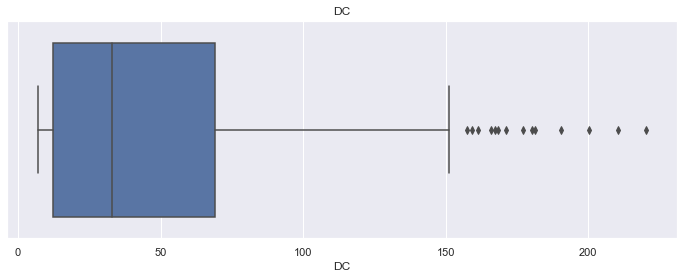

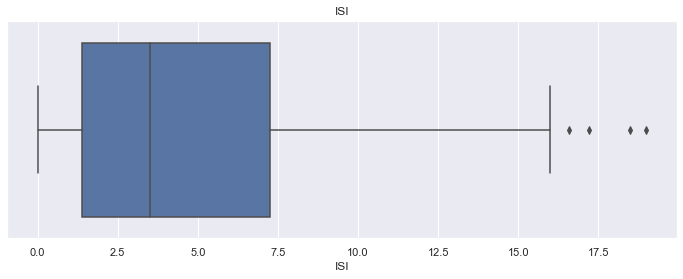

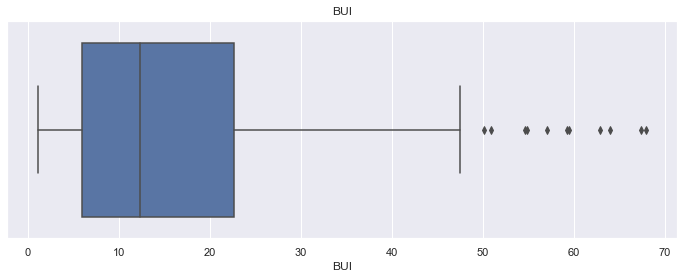

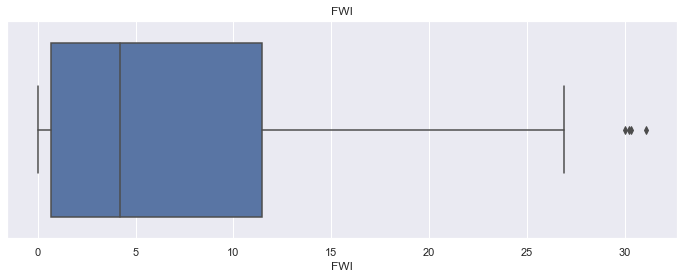

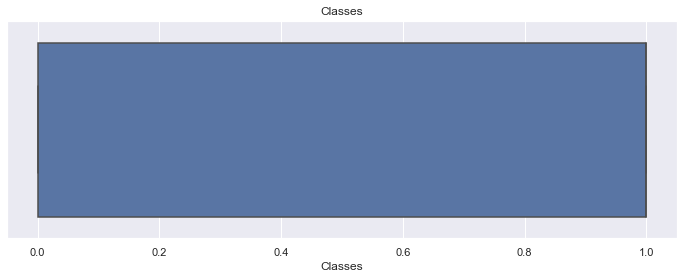

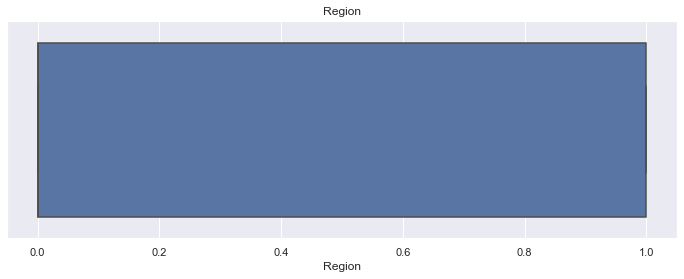

In [57]:
for col in df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)

In [58]:
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df[col] = np.where(df[col]>upper_limit, upper_limit, np.where(df[col]<lower_limit,lower_limit,df[col]))
    return df[df[col] > upper_limit]

In [59]:
remove_outliers_IQR('Rain')

percentile25 0.0
percentile75 0.5
Upper limit 1.25
Lower limit -0.75


Empty DataFrame
Columns: [day, month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [60]:
remove_outliers_IQR('Ws')

percentile25 14.0
percentile75 17.0
Upper limit 21.5
Lower limit 9.5


Empty DataFrame
Columns: [day, month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [61]:
remove_outliers_IQR('FFMC')

percentile25 71.85
percentile75 88.3
Upper limit 112.975
Lower limit 47.17499999999999


Empty DataFrame
Columns: [day, month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [62]:
remove_outliers_IQR('DMC')

percentile25 5.8
percentile75 20.799999999999997
Upper limit 43.29999999999999
Lower limit -16.699999999999992


Empty DataFrame
Columns: [day, month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [63]:
remove_outliers_IQR('DC')

percentile25 12.35
percentile75 69.1
Upper limit 154.22499999999997
Lower limit -72.77499999999999


Empty DataFrame
Columns: [day, month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [64]:
remove_outliers_IQR('ISI')

percentile25 1.4
percentile75 7.25
Upper limit 16.025
Lower limit -7.374999999999998


Empty DataFrame
Columns: [day, month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [65]:
remove_outliers_IQR('BUI')

percentile25 6.0
percentile75 22.65
Upper limit 47.625
Lower limit -18.974999999999998


Empty DataFrame
Columns: [day, month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [66]:
remove_outliers_IQR('FWI')

percentile25 0.7
percentile75 11.45
Upper limit 27.575
Lower limit -15.425


Empty DataFrame
Columns: [day, month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

# Rechecking Outliers After Dropping it

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

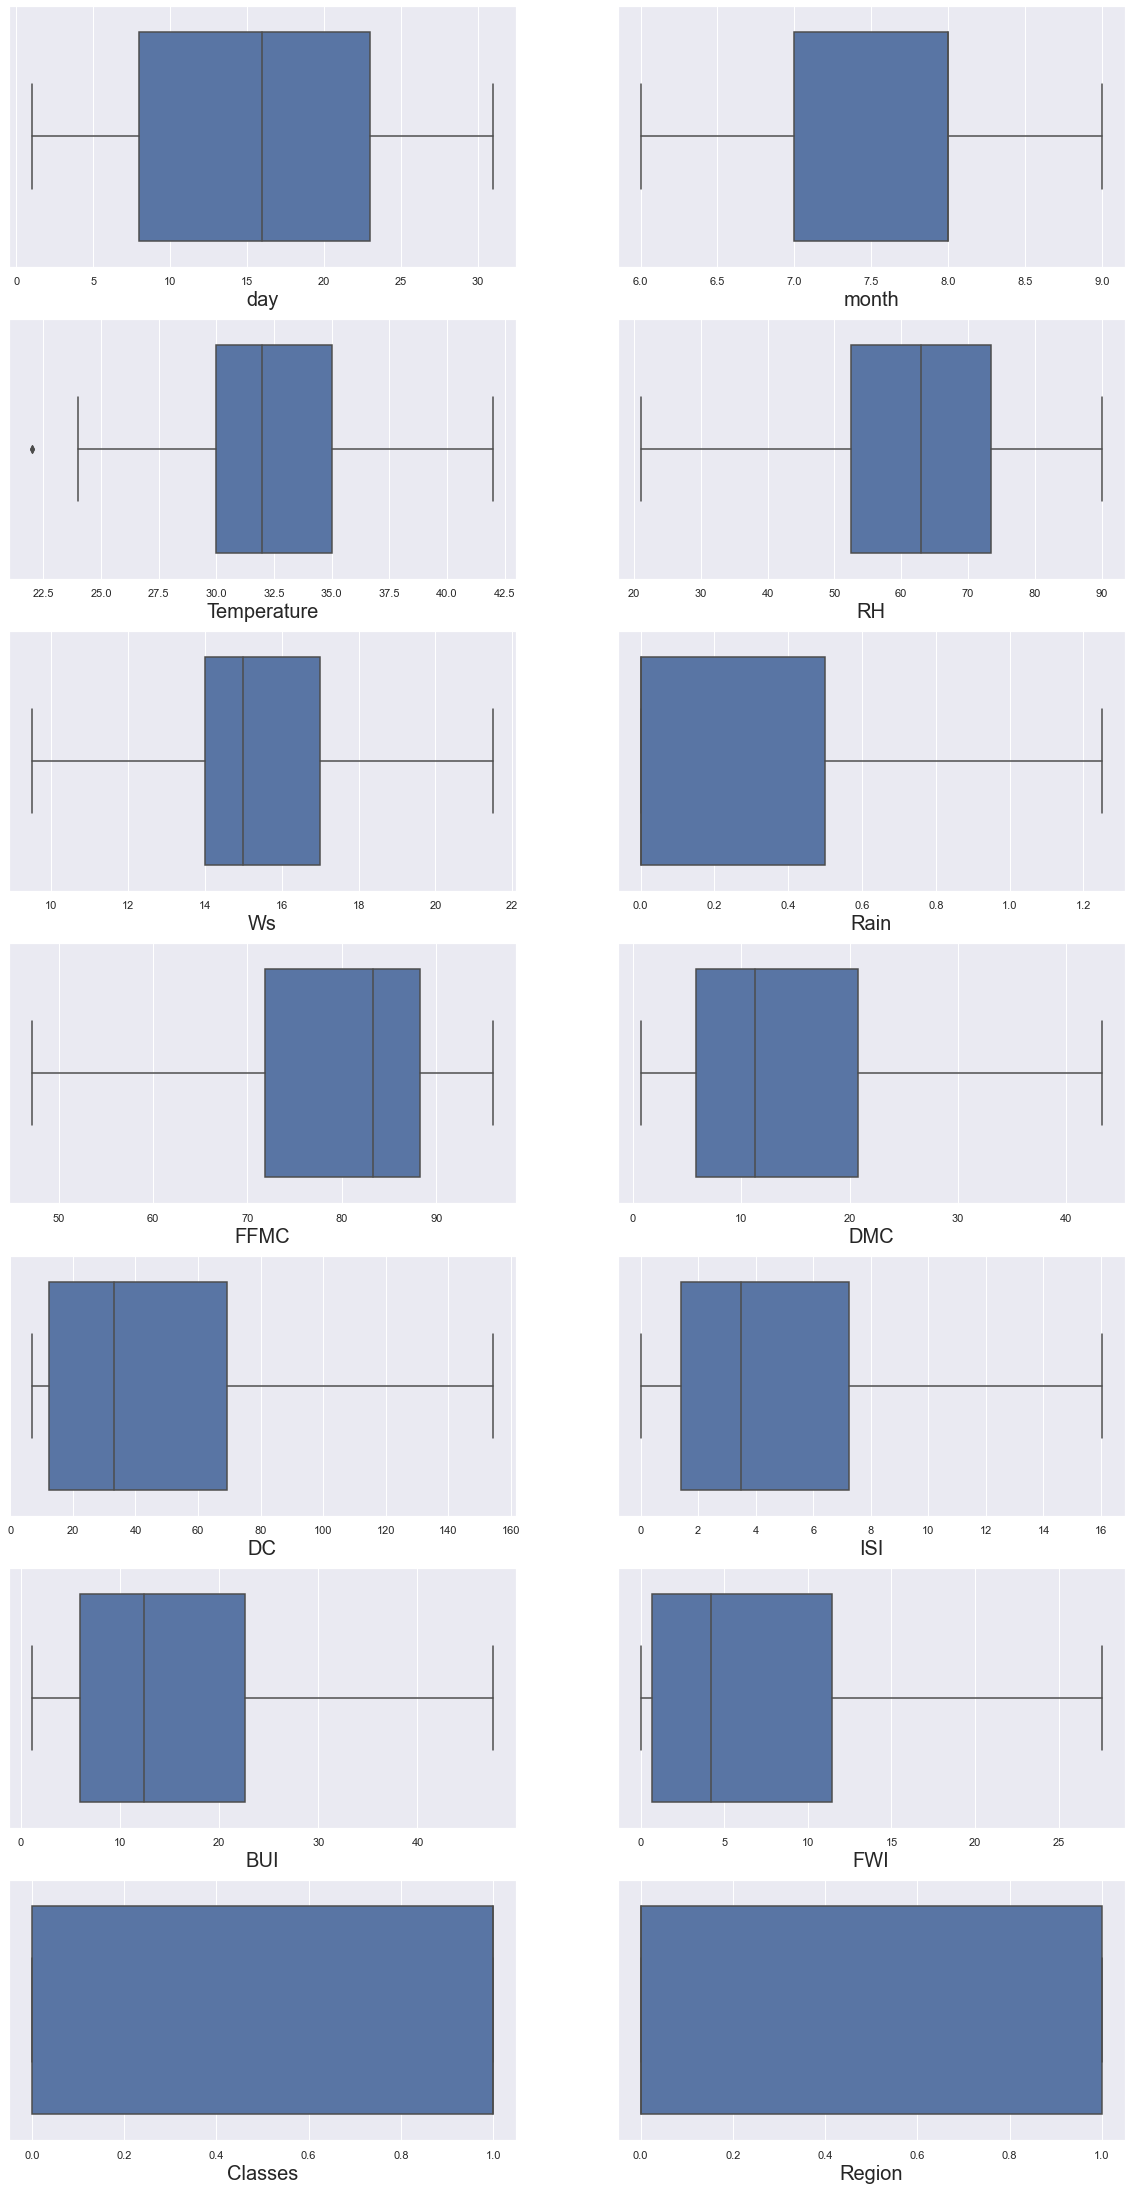

In [67]:
plt.figure(figsize=(20,45), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [68]:
#Observation - Outliers are not present anymore in any of the features

# Creating Independent and Dependent Features

In [69]:
X = df.drop(['Classes'],axis = 1)

In [70]:
y = df.Classes

In [71]:
X

day  month  Temperature    RH    Ws  Rain    FFMC   DMC    DC  ISI   BUI  \
0      1      6         29.0  57.0  18.0  0.00  65.700   3.4   7.6  1.3   3.4   
1      2      6         29.0  61.0  13.0  1.25  64.400   4.1   7.6  1.0   3.9   
2      3      6         26.0  82.0  21.5  1.25  47.175   2.5   7.1  0.3   2.7   
3      4      6         25.0  89.0  13.0  1.25  47.175   1.3   6.9  0.0   1.7   
4      5      6         27.0  77.0  16.0  0.00  64.800   3.0  14.2  1.2   3.9   
..   ...    ...          ...   ...   ...   ...     ...   ...   ...  ...   ...   
238   26      9         30.0  65.0  14.0  0.00  85.400  16.0  44.5  4.5  16.9   
239   27      9         28.0  87.0  15.0  1.25  47.175   6.5   8.0  0.1   6.2   
240   28      9         27.0  87.0  21.5  0.50  47.175   3.5   7.9  0.4   3.4   
241   29      9         24.0  54.0  18.0  0.10  79.700   4.3  15.2  1.7   5.1   
242   30      9         24.0  64.0  15.0  0.20  67.300   3.8  16.5  1.2   4.8   

     FWI  Region  
0    0.5       0  
1    0.4       0  
2    0.1       0  
3    0.0       0  
4    0.5       0  
..   ...     ...  
238  6.5       1  
239  0.0       1  
240  0.2       1  
241  0.7       1  
242  0.5       1  

[243 rows x 13 columns]

In [72]:
y

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

# Visualizing the relationship between Independent and Dependent Features

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

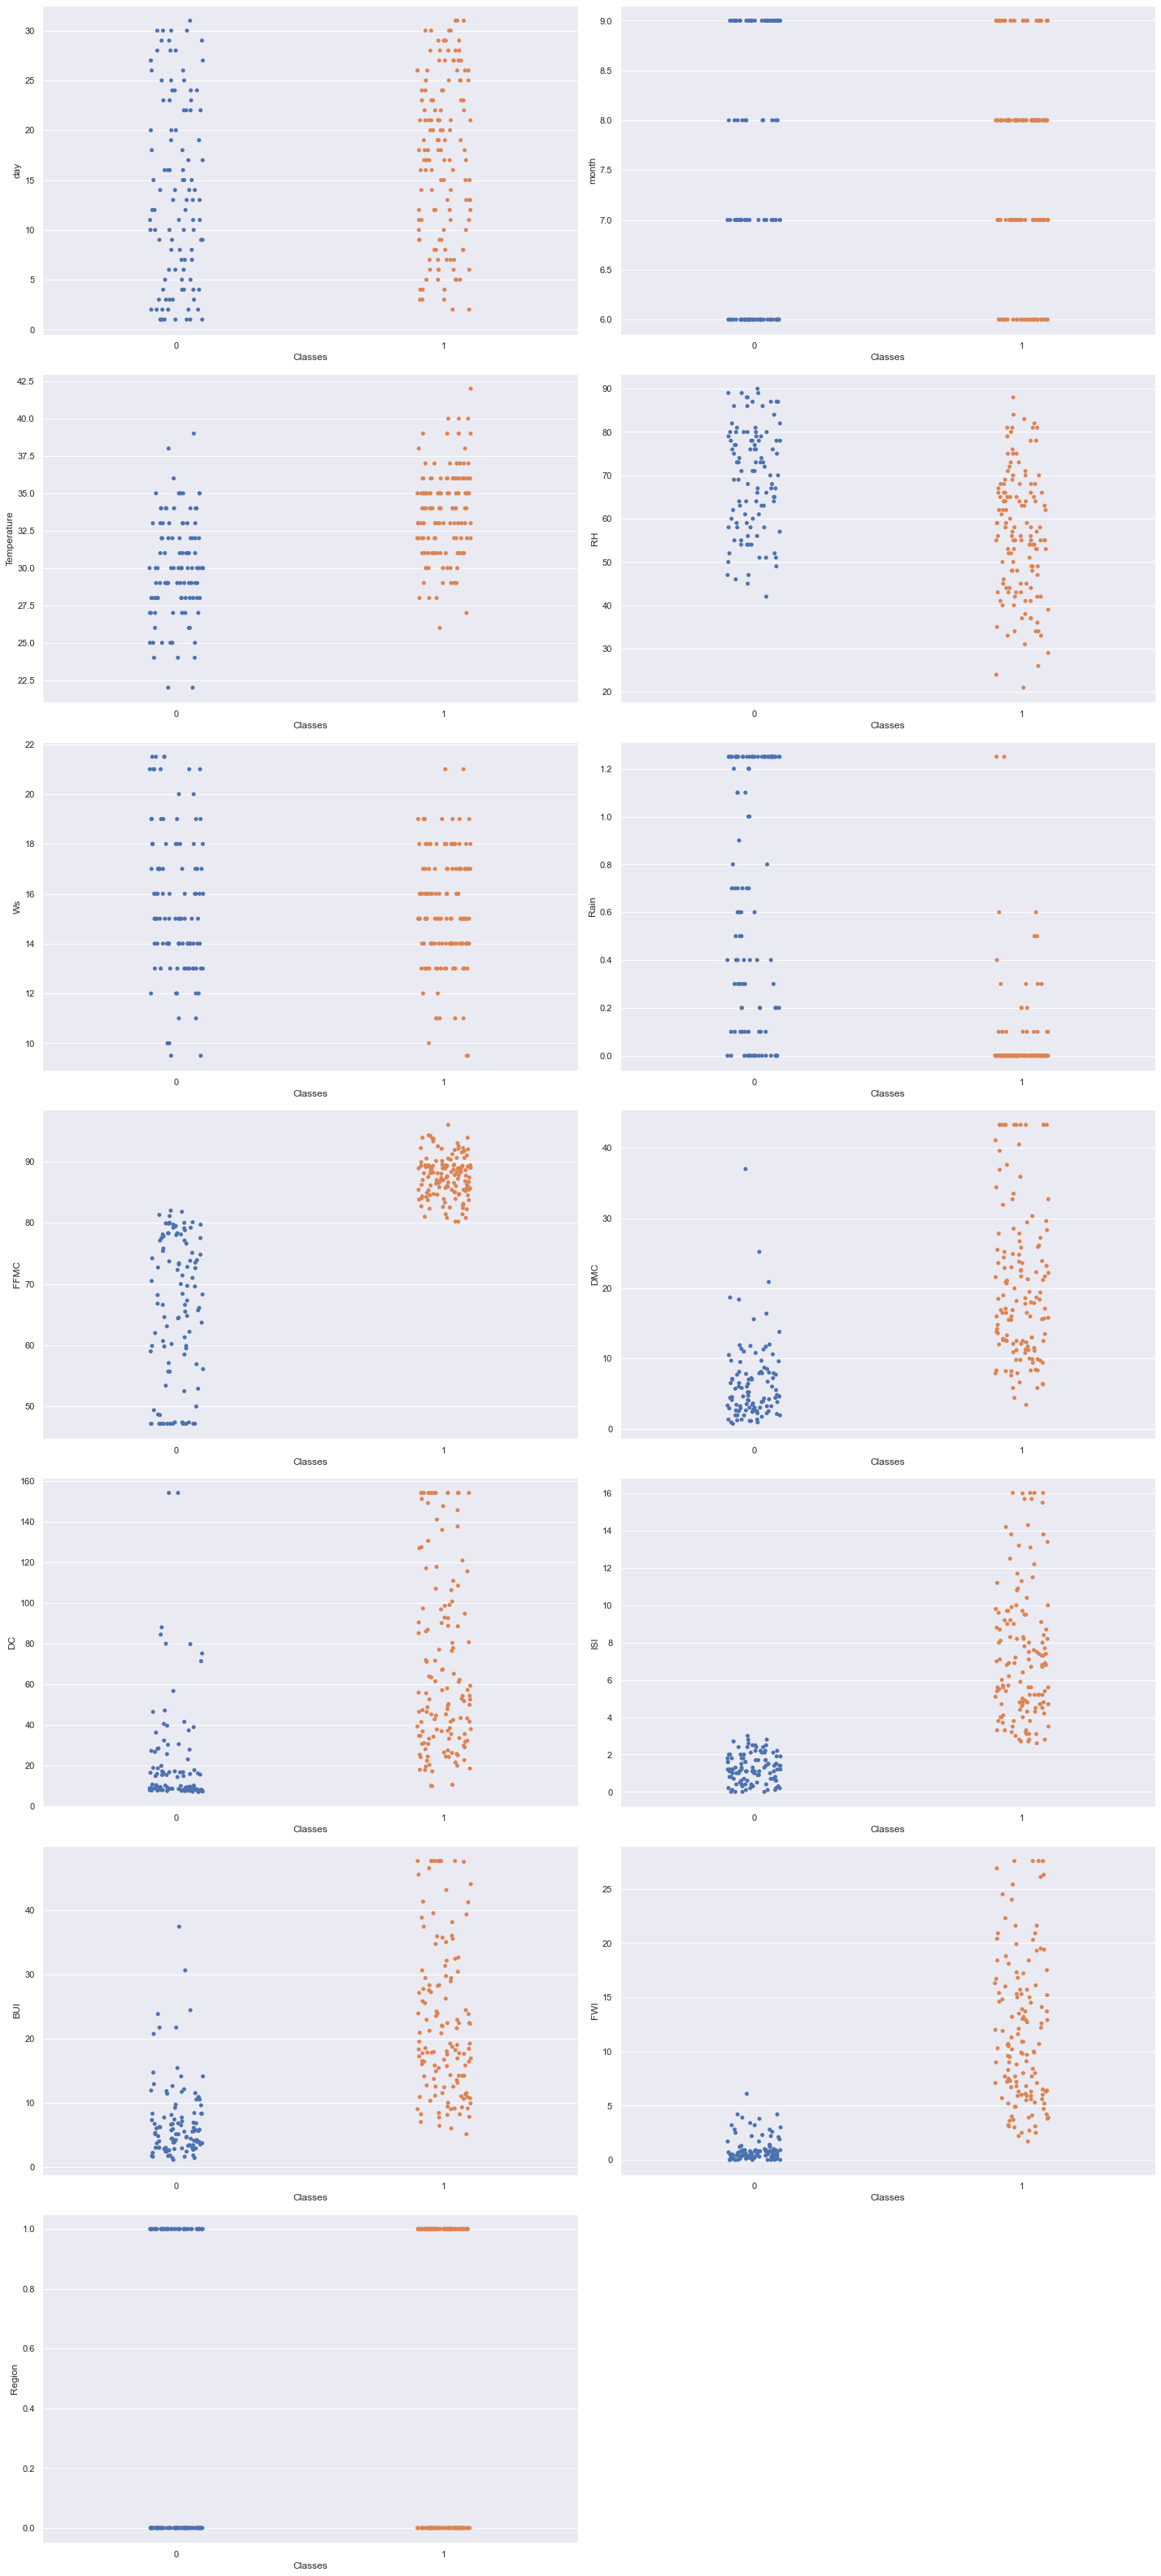

In [73]:
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(8,2,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

# Checking for Relevant Features

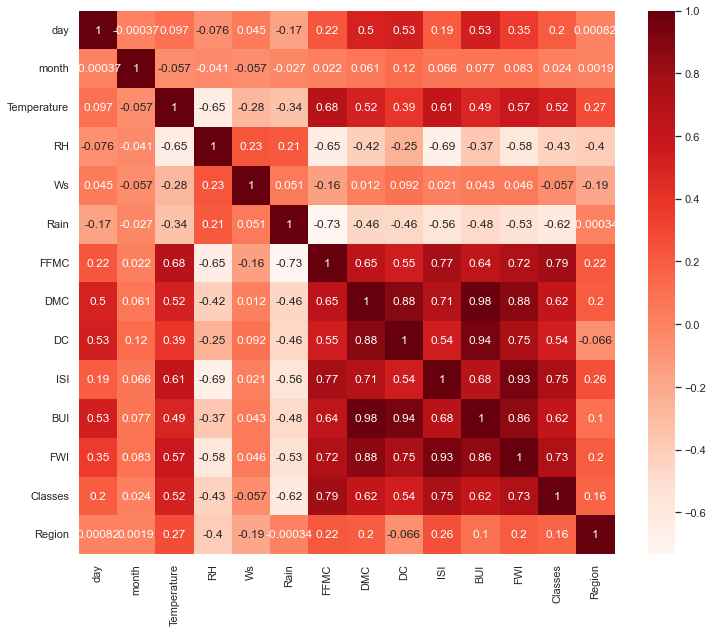

In [74]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [75]:
#Correlation with output variable
cor_target = abs(cor["Classes"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Temperature    0.516015
Rain           0.623214
FFMC           0.794375
DMC            0.616101
DC             0.535756
ISI            0.745087
BUI            0.618641
FWI            0.727335
Classes        1.000000
Name: Classes, dtype: float64

# Importing Sklearn Libraries

In [76]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Train Test Split

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=355)

# Scaling

In [78]:
scaler= StandardScaler()

X_train=scaler.fit_transform(X_train)

#transforming the test data.We avoid fitting the values to prevent data leakage!
X_test=scaler.transform(X_test)

In [79]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_train,i) for i in range(X_train.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

vif     Features
0     1.654944          day
1     1.101108        month
2     2.425486  Temperature
3     3.415124           RH
4     1.359668           Ws
5     3.183955         Rain
6     7.678526         FFMC
7    63.548519          DMC
8    21.957811           DC
9    49.107012          ISI
10  132.578757          BUI
11   73.796072          FWI
12    1.557048       Region

# Logistic Regression Model Training

In [80]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [81]:
import pickle
# Writing different model files to file
with open( 'PredictionModel.sav', 'wb') as f:
    pickle.dump(classifier,f)
    
with open('StandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [82]:
y_pred = classifier.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9672131147540983

In [84]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[27,  0],
       [ 2, 32]], dtype=int64)

In [85]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [86]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9672131147540983

In [87]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [88]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9310344827586207

In [89]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9642857142857143

In [90]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9705882352941176

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

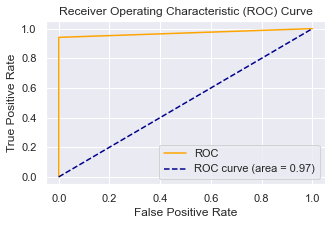

In [92]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Hyperparameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','LogisticRegression'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [94]:
classifier_HypT=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [95]:
classifier_HypT.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'LogisticRegression']},
             scoring='accuracy')

In [96]:
print(classifier_HypT.best_params_)  ## Best parameter

{'C': 10, 'max_iter': 100, 'penalty': 'l2'}


In [97]:
print(classifier_HypT.best_score_)  ## Best Score

0.9668168168168169


In [98]:
y_pred_Tun = classifier_HypT.predict(X_test)

In [99]:
y_pred_Tun

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred_Tun,y_test)
print(score)      #ACCURACY SCORE

0.9836065573770492


In [101]:
print(classification_report(y_pred_Tun,y_test))      #CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.97      1.00      0.99        33

    accuracy                           0.98        61
   macro avg       0.99      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



In [102]:
conf_mat=confusion_matrix(y_pred_Tun,y_test)
conf_mat#CONFUSION MATRIX

array([[27,  1],
       [ 0, 33]], dtype=int64)

In [103]:
#AUC CURVE
auc = roc_auc_score(y_test, y_pred_Tun)
auc    

0.9852941176470589

In [104]:
#ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_Tun)

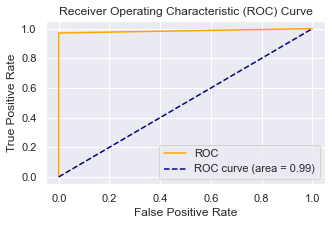

In [105]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Creating Imbalance dataset from the original dataset

In [106]:
df.head()

day  month  Temperature    RH    Ws  Rain    FFMC  DMC    DC  ISI  BUI  \
0    1      6         29.0  57.0  18.0  0.00  65.700  3.4   7.6  1.3  3.4   
1    2      6         29.0  61.0  13.0  1.25  64.400  4.1   7.6  1.0  3.9   
2    3      6         26.0  82.0  21.5  1.25  47.175  2.5   7.1  0.3  2.7   
3    4      6         25.0  89.0  13.0  1.25  47.175  1.3   6.9  0.0  1.7   
4    5      6         27.0  77.0  16.0  0.00  64.800  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5        0       0  
1  0.4        0       0  
2  0.1        0       0  
3  0.0        0       0  
4  0.5        0       0

In [107]:
df.shape

(243, 14)

In [108]:
# 1. splitting data in 90:10 percent ratio using train test split
X1 = pd.DataFrame(df, columns = ['day', 'month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region'])
y1=pd.DataFrame(df,columns = ['Classes'])

In [109]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X1, y1, test_size=0.10, random_state=70)

In [110]:
 # Shape of training and testing imbalanced dataset
X_train_imb.shape, y_train_imb.shape, X_test_imb.shape, y_test_imb.shape

((218, 13), (218, 1), (25, 13), (25, 1))

In [111]:
#Replacing all values as 1 in y_train and all values as zero in y_test to create imbalance

In [112]:
y_train_imb=y_train_imb.replace(0,1)
y_train_imb.head()

Classes
181        1
182        1
174        1
70         1
55         1

In [113]:
y_test_imb=y_test_imb.replace(1,0)
y_test_imb.head()

Classes
179        0
193        0
43         0
61         0
239        0

In [114]:
X_train_imb.head()

day  month  Temperature    RH    Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
181   31      7         37.0  55.0  15.0   0.0  89.3  28.3  67.2   8.3  28.3   
182    1      8         38.0  52.0  14.0   0.0  78.3   4.4  10.5   2.0   4.4   
174   24      7         33.0  63.0  17.0   1.1  72.8  20.9  56.6   1.6  21.7   
70    10      8         35.0  55.0  14.0   0.0  88.9  18.6  67.0   7.4  21.9   
55    26      7         36.0  53.0  19.0   0.0  89.2  17.1  98.6  10.0  23.9   

      FWI  Region  
181  14.5       1  
182   0.8       1  
174   2.5       1  
70   11.6       0  
55   15.3       0

In [115]:
### Combining X_train_imb and y_train_imb
train_imb=X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

day  month  Temperature    RH    Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
181   31      7         37.0  55.0  15.0   0.0  89.3  28.3  67.2   8.3  28.3   
182    1      8         38.0  52.0  14.0   0.0  78.3   4.4  10.5   2.0   4.4   
174   24      7         33.0  63.0  17.0   1.1  72.8  20.9  56.6   1.6  21.7   
70    10      8         35.0  55.0  14.0   0.0  88.9  18.6  67.0   7.4  21.9   
55    26      7         36.0  53.0  19.0   0.0  89.2  17.1  98.6  10.0  23.9   

      FWI  Region  Classes  
181  14.5       1        1  
182   0.8       1        1  
174   2.5       1        1  
70   11.6       0        1  
55   15.3       0        1

In [116]:
### Combining X_test_imb and y_test_imb
test_imb=X_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

day  month  Temperature    RH    Ws  Rain    FFMC   DMC    DC   ISI  \
179   29      7         34.0  59.0  16.0  0.00  88.100  19.5  47.2   7.4   
193   12      8         39.0  21.0  17.0  0.40  93.000  18.4  41.5  15.5   
43    14      7         34.0  61.0  13.0  0.60  73.900   7.8  22.9   1.4   
61     1      8         36.0  45.0  14.0  0.00  78.800   4.8  10.2   2.0   
239   27      9         28.0  87.0  15.0  1.25  47.175   6.5   8.0   0.1   

      BUI   FWI  Region  Classes  
179  19.5  10.9       1        0  
193  18.4  18.8       1        0  
43    8.4   0.8       0        0  
61    4.7   0.9       0        0  
239   6.2   0.0       1        0

In [117]:
### Checking the shape of imbalanced Data
train_imb.shape, test_imb.shape

((218, 14), (25, 14))

In [118]:
### Combining train_imb dataset and test_imb dataset into data_imb dataset 
df_imb=pd.concat([train_imb, test_imb], ignore_index=True, sort=False)
df_imb.head()

day  month  Temperature    RH    Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
0   31      7         37.0  55.0  15.0   0.0  89.3  28.3  67.2   8.3  28.3   
1    1      8         38.0  52.0  14.0   0.0  78.3   4.4  10.5   2.0   4.4   
2   24      7         33.0  63.0  17.0   1.1  72.8  20.9  56.6   1.6  21.7   
3   10      8         35.0  55.0  14.0   0.0  88.9  18.6  67.0   7.4  21.9   
4   26      7         36.0  53.0  19.0   0.0  89.2  17.1  98.6  10.0  23.9   

    FWI  Region  Classes  
0  14.5       1        1  
1   0.8       1        1  
2   2.5       1        1  
3  11.6       0        1  
4  15.3       0        1

In [119]:
df_imb.shape

(243, 14)

In [120]:
df_imb.Classes.value_counts()

1    218
0     25
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

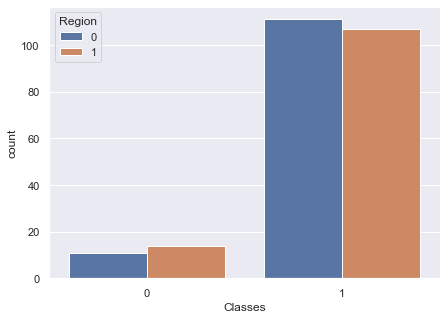

In [121]:
## 0 is 'Bejaia' and 1 is 'Sidi Bel-abbes region'
plt.figure(figsize=(7,5))
sns.countplot(data=df_imb,x='Classes',hue='Region')

In [122]:
#Performing Logistic Regression on imbalanced Dataset

In [123]:
df_imb.head()

day  month  Temperature    RH    Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
0   31      7         37.0  55.0  15.0   0.0  89.3  28.3  67.2   8.3  28.3   
1    1      8         38.0  52.0  14.0   0.0  78.3   4.4  10.5   2.0   4.4   
2   24      7         33.0  63.0  17.0   1.1  72.8  20.9  56.6   1.6  21.7   
3   10      8         35.0  55.0  14.0   0.0  88.9  18.6  67.0   7.4  21.9   
4   26      7         36.0  53.0  19.0   0.0  89.2  17.1  98.6  10.0  23.9   

    FWI  Region  Classes  
0  14.5       1        1  
1   0.8       1        1  
2   2.5       1        1  
3  11.6       0        1  
4  15.3       0        1

In [124]:
X1 = df_imb.drop(columns = ['Classes'])
y1 = df_imb['Classes']

In [125]:
X1

day  month  Temperature    RH    Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
0     31      7         37.0  55.0  15.0   0.0  89.3  28.3  67.2   8.3  28.3   
1      1      8         38.0  52.0  14.0   0.0  78.3   4.4  10.5   2.0   4.4   
2     24      7         33.0  63.0  17.0   1.1  72.8  20.9  56.6   1.6  21.7   
3     10      8         35.0  55.0  14.0   0.0  88.9  18.6  67.0   7.4  21.9   
4     26      7         36.0  53.0  19.0   0.0  89.2  17.1  98.6  10.0  23.9   
..   ...    ...          ...   ...   ...   ...   ...   ...   ...   ...   ...   
238    1      6         32.0  71.0  12.0   0.7  57.1   2.5   8.2   0.6   2.8   
239    4      8         38.0  35.0  15.0   0.0  93.8  23.0  42.7  15.7  22.9   
240    6      8         32.0  75.0  14.0   0.0  86.4  13.0  39.1   5.2  14.2   
241   26      6         36.0  62.0  16.0   0.0  87.8  16.5  34.5   7.0  16.4   
242   18      6         31.0  78.0  14.0   0.3  56.9   1.9   8.0   0.7   2.4   

      FWI  Region  
0    14.5       1  
1     0.8       1  
2     2.5       1  
3    11.6       0  
4    15.3       0  
..    ...     ...  
238   0.2       1  
239  20.9       1  
240   6.8       0  
241   9.5       1  
242   0.2       0  

[243 rows x 13 columns]

In [126]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
238    0
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

In [127]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [128]:
# Handling Imbalance dataset by Doing Upsampling
### for upsampling 
from imblearn.combine import SMOTETomek

In [129]:
smk=SMOTETomek()
smk

SMOTETomek()

In [130]:
X_bal,y_bal=smk.fit_resample(X1,y1)

In [131]:
X_bal.head()

day  month  Temperature    RH    Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
0   31      7         37.0  55.0  15.0   0.0  89.3  28.3  67.2   8.3  28.3   
1    1      8         38.0  52.0  14.0   0.0  78.3   4.4  10.5   2.0   4.4   
2   24      7         33.0  63.0  17.0   1.1  72.8  20.9  56.6   1.6  21.7   
3   10      8         35.0  55.0  14.0   0.0  88.9  18.6  67.0   7.4  21.9   
4   26      7         36.0  53.0  19.0   0.0  89.2  17.1  98.6  10.0  23.9   

    FWI  Region  
0  14.5       1  
1   0.8       1  
2   2.5       1  
3  11.6       0  
4  15.3       0

In [134]:
y_bal.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

In [135]:
X_bal.shape, y_bal.shape

((428, 13), (428,))

In [137]:
# Creating Balanced data from imbalanced data
data_bal=X_bal.join(y_bal)

In [138]:
data_bal.head()

day  month  Temperature    RH    Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
0   31      7         37.0  55.0  15.0   0.0  89.3  28.3  67.2   8.3  28.3   
1    1      8         38.0  52.0  14.0   0.0  78.3   4.4  10.5   2.0   4.4   
2   24      7         33.0  63.0  17.0   1.1  72.8  20.9  56.6   1.6  21.7   
3   10      8         35.0  55.0  14.0   0.0  88.9  18.6  67.0   7.4  21.9   
4   26      7         36.0  53.0  19.0   0.0  89.2  17.1  98.6  10.0  23.9   

    FWI  Region  Classes  
0  14.5       1        1  
1   0.8       1        1  
2   2.5       1        1  
3  11.6       0        1  
4  15.3       0        1

In [140]:
#EDA on balanced Dataset
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          428 non-null    int32  
 1   month        428 non-null    int32  
 2   Temperature  428 non-null    float64
 3   RH           428 non-null    float64
 4   Ws           428 non-null    float64
 5   Rain         428 non-null    float64
 6   FFMC         428 non-null    float64
 7   DMC          428 non-null    float64
 8   DC           428 non-null    float64
 9   ISI          428 non-null    float64
 10  BUI          428 non-null    float64
 11  FWI          428 non-null    float64
 12  Region       428 non-null    int64  
 13  Classes      428 non-null    int64  
dtypes: float64(10), int32(2), int64(2)
memory usage: 43.6 KB


In [141]:
#Statistical analysis on Balanced Dataset
data_bal.describe().T

count       mean        std     min        25%        50%  \
day          428.0  14.065421   8.843708   1.000   6.000000  13.000000   
month        428.0   7.280374   0.970713   6.000   7.000000   7.000000   
Temperature  428.0  32.573126   3.187284  22.000  31.000000  33.000000   
RH           428.0  61.273339  13.971355  21.000  53.079358  62.047334   
Ws           428.0  15.404371   2.285432   9.500  13.917874  15.007936   
Rain         428.0   0.271868   0.416245   0.000   0.000000   0.000000   
FFMC         428.0  79.376992  12.495609  47.175  73.312204  84.600000   
DMC          428.0  14.108931  10.500521   0.700   6.421487  11.378153   
DC           428.0  46.165354  42.451715   6.900  15.193635  33.594412   
ISI          428.0   5.101070   4.099016   0.000   1.500000   4.429817   
BUI          428.0  15.830831  12.170087   1.100   6.575000  12.500000   
FWI          428.0   7.342189   7.253397   0.000   0.800000   5.657073   
Region       428.0   0.371495   0.483770   0.000   0.000000   0.000000   
Classes      428.0   0.500000   0.500585   0.000   0.000000   0.500000   

                   75%      max  
day          22.000000   31.000  
month         8.000000    9.000  
Temperature  34.599618   42.000  
RH           70.468287   90.000  
Ws           17.000000   21.500  
Rain          0.400000    1.250  
FFMC         88.340861   96.000  
DMC          18.700000   43.300  
DC           54.600000  154.225  
ISI           7.503859   16.025  
BUI          21.173929   47.625  
FWI          11.413581   27.575  
Region        1.000000    1.000  
Classes       1.000000    1.000

In [143]:
#correlation
data_bal.corr()

day     month  Temperature        RH        Ws      Rain  \
day          1.000000  0.054601     0.066831 -0.084941  0.100557 -0.146203   
month        0.054601  1.000000    -0.042686 -0.076734 -0.026635 -0.029730   
Temperature  0.066831 -0.042686     1.000000 -0.681340 -0.162319 -0.285506   
RH          -0.084941 -0.076734    -0.681340  1.000000  0.040770  0.230676   
Ws           0.100557 -0.026635    -0.162319  0.040770  1.000000 -0.125454   
Rain        -0.146203 -0.029730    -0.285506  0.230676 -0.125454  1.000000   
FFMC         0.183213  0.089004     0.641078 -0.644571  0.072384 -0.743299   
DMC          0.560666  0.104584     0.479239 -0.455551  0.180622 -0.457436   
DC           0.596710  0.159364     0.328512 -0.258658  0.215493 -0.452702   
ISI          0.247029  0.112925     0.607309 -0.717194  0.211500 -0.562359   
BUI          0.589897  0.121567     0.437617 -0.395188  0.199714 -0.468562   
FWI          0.418175  0.125083     0.556662 -0.615452  0.228602 -0.534819   
Region       0.061635  0.056955     0.218400 -0.385082 -0.034145  0.039245   
Classes      0.195203  0.250615    -0.181495  0.085892  0.043939  0.133415   

                 FFMC       DMC        DC       ISI       BUI       FWI  \
day          0.183213  0.560666  0.596710  0.247029  0.589897  0.418175   
month        0.089004  0.104584  0.159364  0.112925  0.121567  0.125083   
Temperature  0.641078  0.479239  0.328512  0.607309  0.437617  0.556662   
RH          -0.644571 -0.455551 -0.258658 -0.717194 -0.395188 -0.615452   
Ws           0.072384  0.180622  0.215493  0.211500  0.199714  0.228602   
Rain        -0.743299 -0.457436 -0.452702 -0.562359 -0.468562 -0.534819   
FFMC         1.000000  0.644457  0.528369  0.788572  0.623242  0.731379   
DMC          0.644457  1.000000  0.889591  0.742045  0.983206  0.900496   
DC           0.528369  0.889591  1.000000  0.562973  0.951121  0.768752   
ISI          0.788572  0.742045  0.562973  1.000000  0.700040  0.941581   
BUI          0.623242  0.983206  0.951121  0.700040  1.000000  0.878816   
FWI          0.731379  0.900496  0.768752  0.941581  0.878816  1.000000   
Region       0.174682  0.197128 -0.001998  0.258335  0.124747  0.213066   
Classes     -0.125490 -0.006421  0.029536 -0.143756  0.006594 -0.091188   

               Region   Classes  
day          0.061635  0.195203  
month        0.056955  0.250615  
Temperature  0.218400 -0.181495  
RH          -0.385082  0.085892  
Ws          -0.034145  0.043939  
Rain         0.039245  0.133415  
FFMC         0.174682 -0.125490  
DMC          0.197128 -0.006421  
DC          -0.001998  0.029536  
ISI          0.258335 -0.143756  
BUI          0.124747  0.006594  
FWI          0.213066 -0.091188  
Region       1.000000  0.236931  
Classes      0.236931  1.000000

In [144]:
#Compairing the features of Original and Balanced Dataset
num_bal_col=[feature for feature in data_bal.columns if data_bal[feature].dtype != 'O']
num_bal_col

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region',
 'Classes']

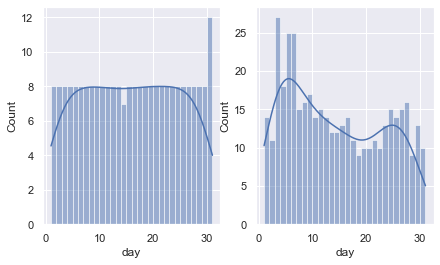

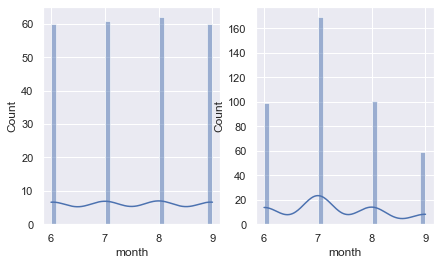

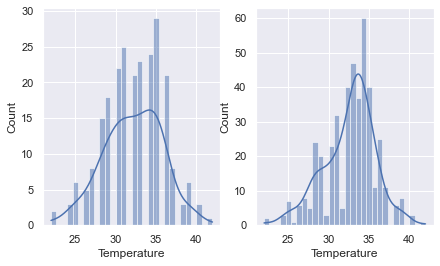

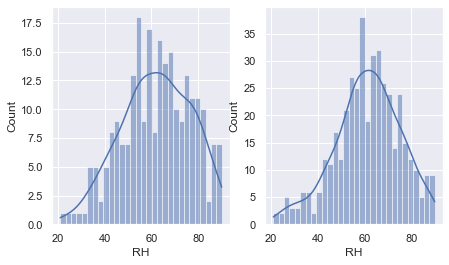

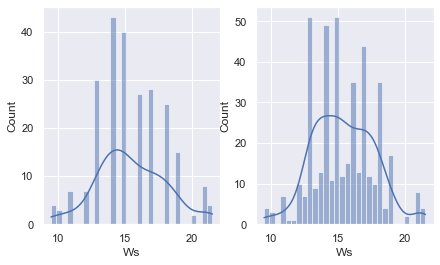

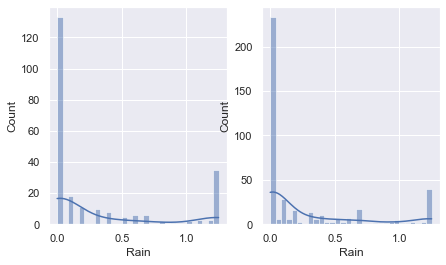

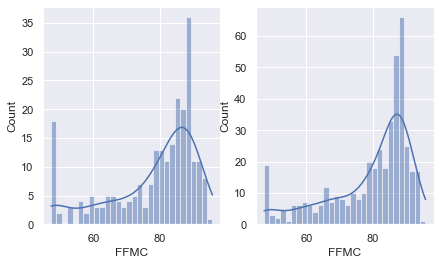

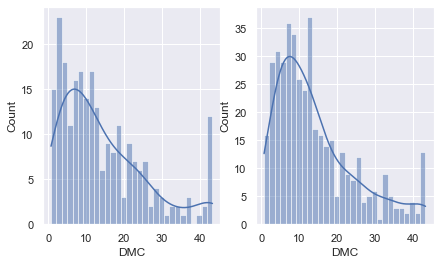

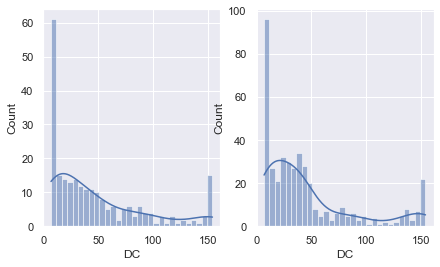

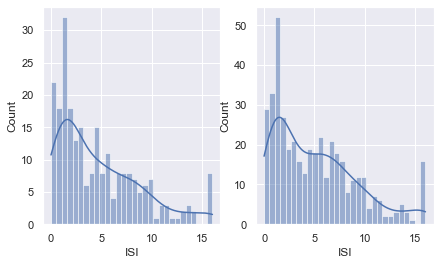

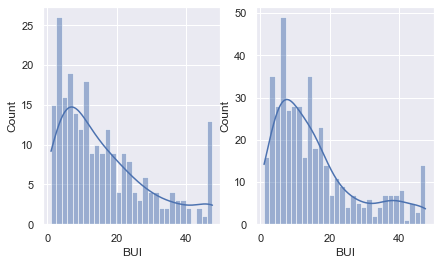

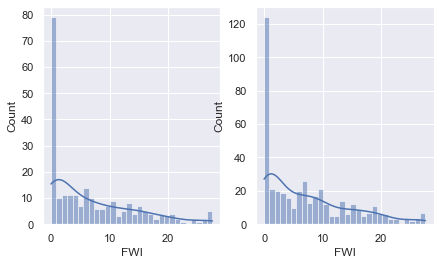

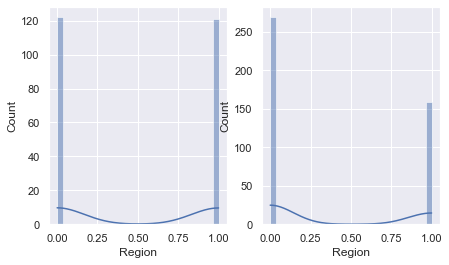

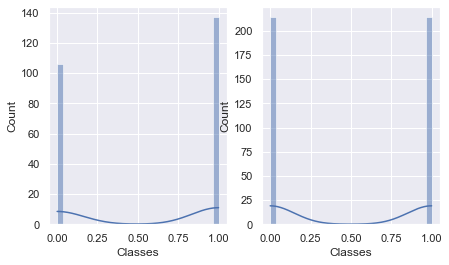

In [146]:
for i in num_bal_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.histplot(data=df,x=i,kde=True,bins=30)
    
    
    plt.subplot(122)
    sns.histplot(data=data_bal,x=i,kde=True,bins=30)

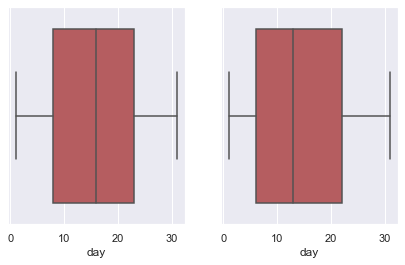

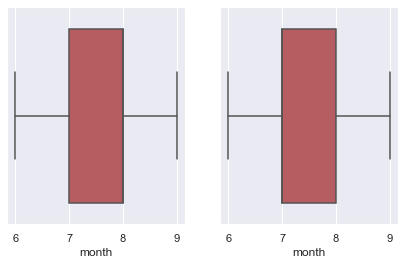

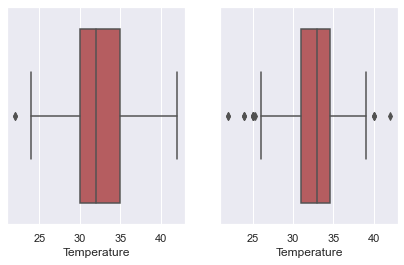

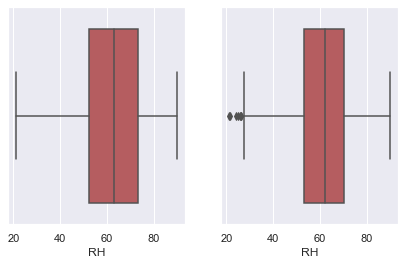

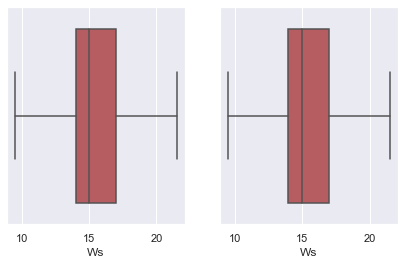

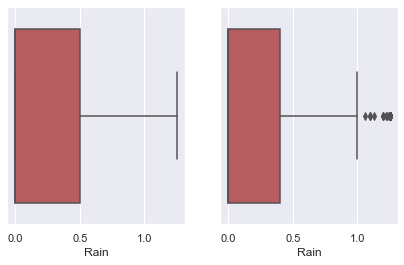

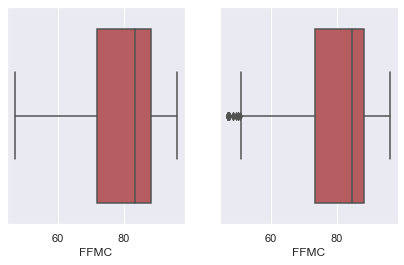

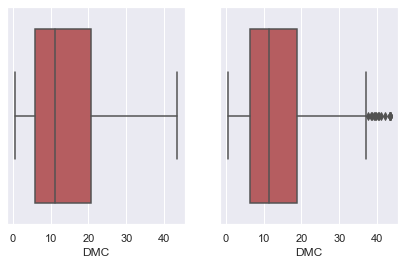

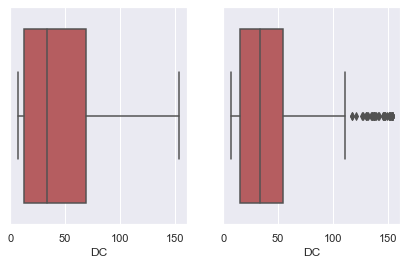

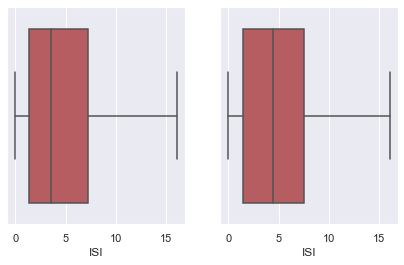

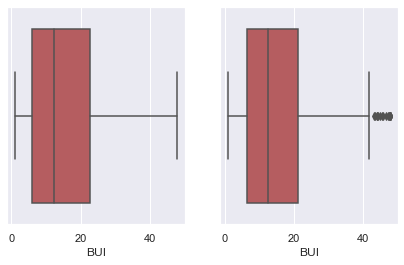

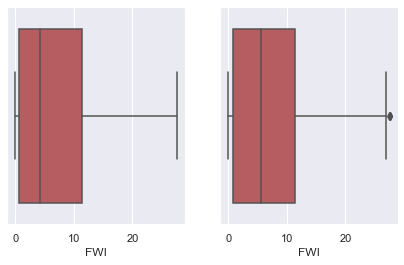

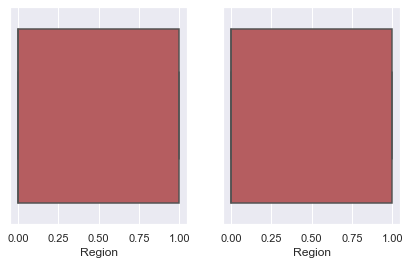

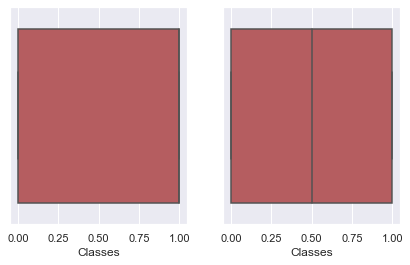

In [147]:
#Checking the Outliers for Original and Balanced Dataset
for i in num_bal_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.boxplot(data=df,x=i,color='r')
    
    
    plt.subplot(122)
    sns.boxplot(data=data_bal,x=i,color='r')

In [148]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_bal,y_bal,test_size=0.30,random_state=35)

In [149]:
X_train1

day  month  Temperature         RH         Ws      Rain       FFMC  \
348    7      7    32.415670  62.094668  14.131664  0.989717  71.601196   
392   27      7    32.729497  60.963302  16.094245  0.000000  88.606116   
23    14      9    22.000000  76.000000  21.500000  1.250000  47.400000   
31    15      6    28.000000  80.000000  17.000000  1.250000  49.400000   
359    5      7    34.000000  58.041646  17.916709  0.000000  88.004165   
..   ...    ...          ...        ...        ...       ...        ...   
232   30      8    34.000000  49.000000  15.000000  0.000000  89.200000   
249   29      7    33.097118  65.320171  15.548559  0.000000  87.422839   
33     1      9    29.000000  86.000000  16.000000  0.000000  47.175000   
271    3      8    27.905599  73.489581  16.188802  0.009440  81.812955   
201   19      8    35.000000  66.000000  15.000000  0.100000  82.700000   

           DMC          DC       ISI        BUI        FWI  Region  
348   7.494233   10.909031  1.471599   7.216866   0.894233       1  
392  32.754824  136.930276  8.773311  39.604949  17.617432       0  
23    1.100000    7.000000  0.400000   1.600000   0.100000       0  
31    3.000000    7.400000  0.400000   3.000000   0.100000       0  
359  13.845709   37.233114  7.975013  14.324886   9.941646       1  
..         ...         ...       ...        ...        ...     ...  
232  24.800000  154.225000  8.100000  35.700000  16.000000       1  
249  22.750374   83.224976  6.587407  26.497332  11.351441       0  
33    0.900000    8.200000  0.100000   1.400000   0.000000       1  
271   4.787045   23.393748  3.215039   6.217123   2.443359       1  
201  32.700000   96.800000  3.300000  35.500000   7.700000       1  

[299 rows x 13 columns]

In [150]:
X_test1

day  month  Temperature         RH         Ws      Rain       FFMC  \
398    5      7    32.570956  70.146878  15.141911  0.000000  86.856764   
375   10      7    33.007262  68.941902  13.000000  0.699274  66.653014   
169   20      6    31.000000  72.000000  14.000000  0.200000  60.200000   
268   25      7    33.863680  64.613439  16.397760  0.000000  87.764800   
161   15      9    32.000000  51.000000  13.000000  0.000000  88.700000   
..   ...    ...          ...        ...        ...       ...        ...   
263    6      7    33.654552  66.036343  15.072686  0.000000  86.385463   
343    5      7    32.574063  70.120466  15.148126  0.000000  86.859250   
406   20      7    36.048051  29.144153  17.927924  0.000000  93.897597   
344   12      6    31.911014  60.403147  14.492133  0.450787  75.153392   
288    8      7    33.471791  66.169254  13.000000  0.959485  68.062552   

           DMC          DC        ISI        BUI        FWI  Region  
398  13.171287   38.443401   5.999338  14.171452   7.684981       0  
375   6.013072    9.398766   1.102179   5.818882   0.502179       0  
169   3.800000    8.000000   0.800000   3.700000   0.300000       1  
268  29.868256  138.321857   7.603456  38.773952  15.860320       0  
161  16.000000   50.200000   6.900000  17.800000   9.800000       1  
..         ...         ...        ...        ...        ...     ...  
263  11.583627   36.643500   5.476358  12.847246   6.756351       0  
343  13.172219   38.439828   6.003688  14.171297   7.689797       0  
406  39.201177   79.689435  16.017192  39.101177  27.414630       1  
344   8.008899   20.452902   1.698427   8.370157   1.128269       0  
288   6.566149    9.535896   1.147179   6.318970   0.547179       0  

[129 rows x 13 columns]

In [151]:
y_test1

398    0
375    0
169    1
268    0
161    1
      ..
263    0
343    0
406    0
344    0
288    0
Name: Classes, Length: 129, dtype: int64

In [152]:
y_train1

348    0
392    0
23     1
31     1
359    0
      ..
232    0
249    0
33     1
271    0
201    1
Name: Classes, Length: 299, dtype: int64

# Logistic Regression Model

In [153]:
from sklearn.linear_model import LogisticRegression
classifier_bal=LogisticRegression()
classifier_bal

LogisticRegression()

In [154]:
from sklearn.model_selection import GridSearchCV
parameter_bal={'penalty':['l1','l2','LogisticRegression'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [155]:
classifier_bal_HypT=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [156]:
#Feature Scaling

In [158]:
classifier_bal_HypT.fit(X_train1,y_train1)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'LogisticRegression']},
             scoring='accuracy')

In [160]:
print(classifier_bal_HypT.best_params_)

{'C': 5, 'max_iter': 300, 'penalty': 'l2'}


In [161]:
print(classifier_bal_HypT.best_score_)

0.6923163841807909


In [162]:
#Prediction

In [177]:
y_pred_bal = classifier_bal_HypT.predict(X_test1)

In [178]:
y_pred_bal

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [179]:
#Accuracy

In [180]:
from sklearn.metrics import accuracy_score,classification_report
bal_score=accuracy_score(y_pred_bal,y_test1)
print(bal_score)

0.7674418604651163


In [181]:
#Classification Report

In [182]:
print(classification_report(y_pred_bal,y_test1))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        73
           1       0.68      0.88      0.77        56

    accuracy                           0.77       129
   macro avg       0.78      0.78      0.77       129
weighted avg       0.79      0.77      0.77       129



In [183]:
#Performance Metrics

In [184]:
#Confusion Metrics
conf_mat_bal=confusion_matrix(y_pred_bal,y_test1)

In [185]:
conf_mat_bal

array([[50, 23],
       [ 7, 49]], dtype=int64)

# Conclusion

In [186]:
#Performance of Logistic Model on Original Dataset
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.94      1.00      0.97        32

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



In [188]:
#Performance of Logistic Model on Balanced Dataset which is created from imbalanced dataset
print(classification_report(y_pred_bal,y_test1))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        73
           1       0.68      0.88      0.77        56

    accuracy                           0.77       129
   macro avg       0.78      0.78      0.77       129
weighted avg       0.79      0.77      0.77       129



# Observation: - We have observed that model is good when we predict from original dataset and is bad when we try to predict from balanced dataset (created from an imbalanced dataset)